In [1]:
from fact.auxservices import AuxService
import numpy as np
import pandas as pd
from tqdm import tqdm
from astropy.table import Table
import matplotlib.dates as dates
import matplotlib.pyplot as plt
%matplotlib inline

pre_path='/gpfs0/fact/fact-archive/rev_1/aux/'
#pre_path='../data/aux/'

In [2]:
temp = np.array([[]]*160).T
time = np.array([])
for date in tqdm(pd.date_range("01-01-2012", "31-12-2017")):
    day, month, year = date.day, date.month, date.year
    try:
        table = Table.read(pre_path+'{}/{:02d}/{:02d}/{}{:02d}{:02d}.FAD_CONTROL_TEMPERATURE.fits'.format(year, month, day, year, month, day))
        temp = np.concatenate((temp, np.array(table['temp'])))
        time = np.concatenate((time, np.array(table['Time'])))
    except Exception as errInfos:
        #print(str(errInfos))
        continue
    
datetime = pd.to_datetime(time * 24 * 3600 * 1e9)
start_date = datetime[0].date()
end_date = datetime[-1].date()

100%|██████████| 366/366 [04:31<00:00,  1.37s/it]


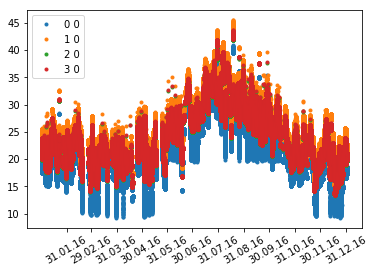

In [4]:
for j in range(1):
    plt.figure()
    for i in range(4):
        k = j*4 + i
        plt.plot(datetime, temp[:, k], '.', label=str(i)+' '+str(j))
    #plt.gca().ticklabel_format(useOffset=False)
    timeLabel = pd.date_range(start=start_date, end=end_date, freq="M")
    plt.xticks(timeLabel, timeLabel, rotation=30)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%y"))
    plt.legend(loc='upper left')

 50%|█████     | 20/40 [00:21<00:22,  1.12s/it]/swdev_nfs/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 40/40 [00:44<00:00,  1.09s/it]


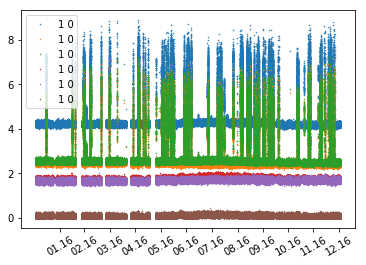

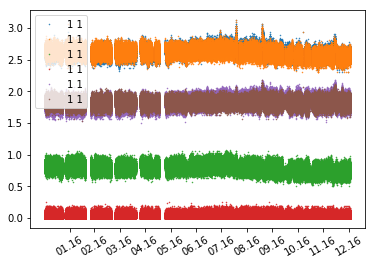

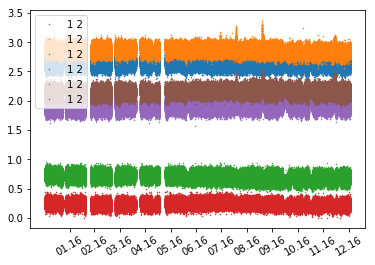

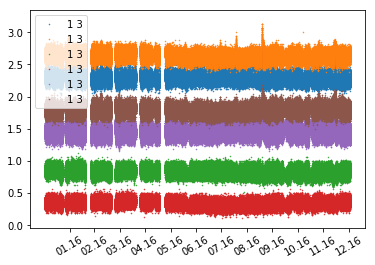

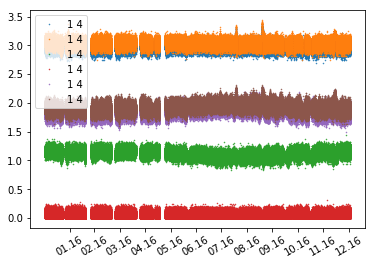

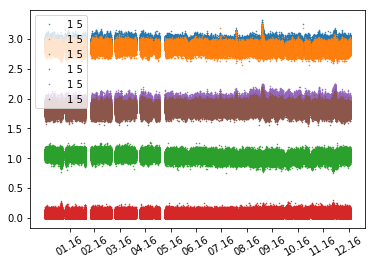

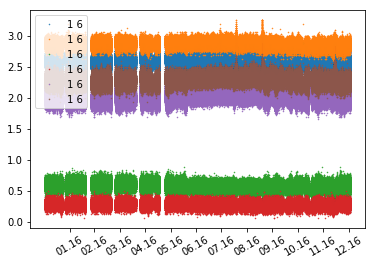

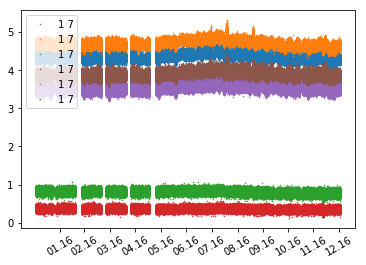

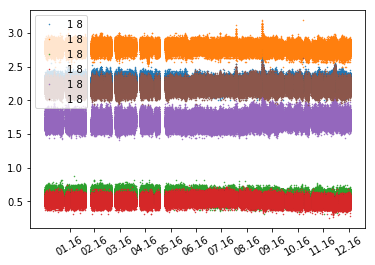

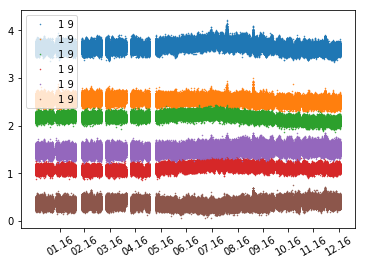

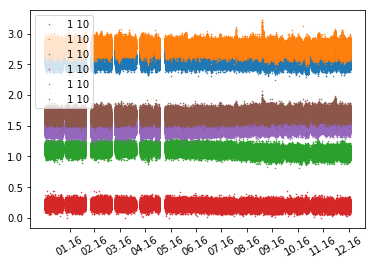

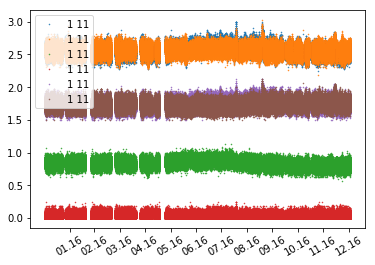

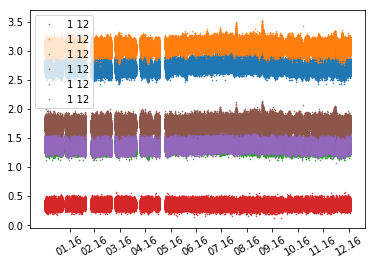

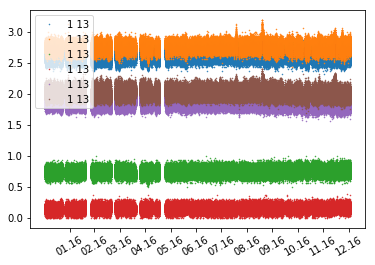

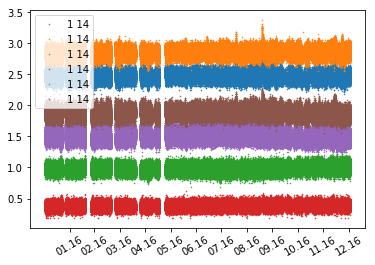

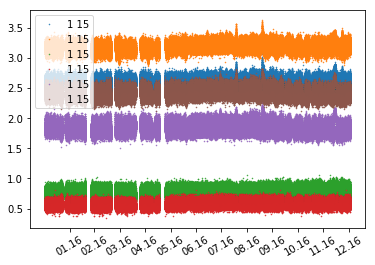

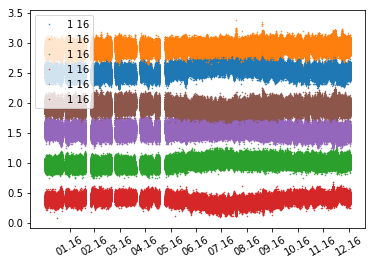

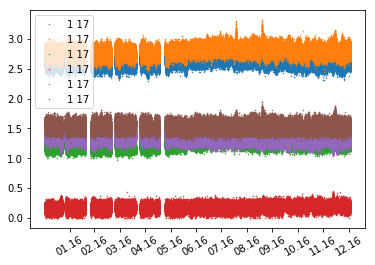

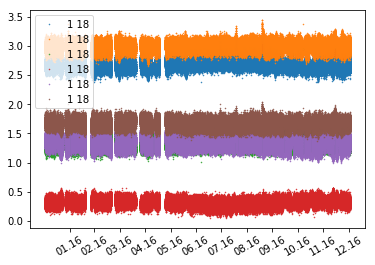

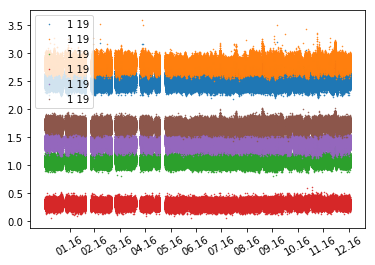

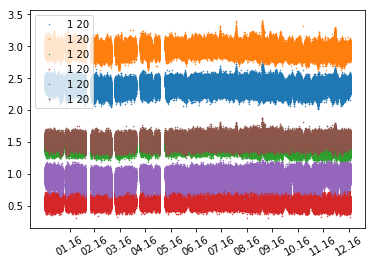

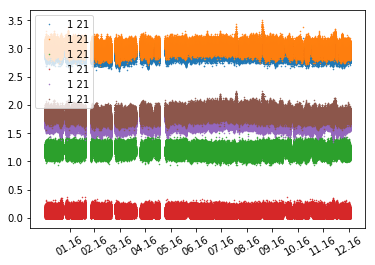

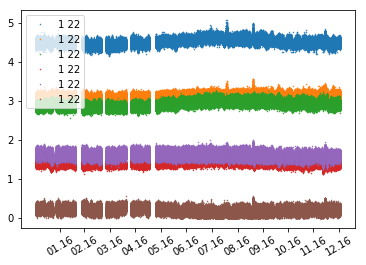

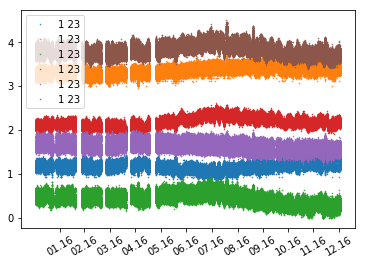

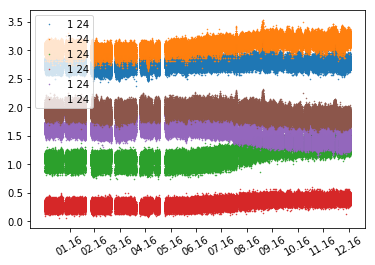

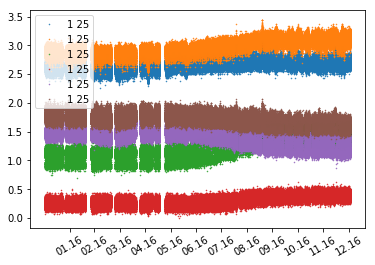

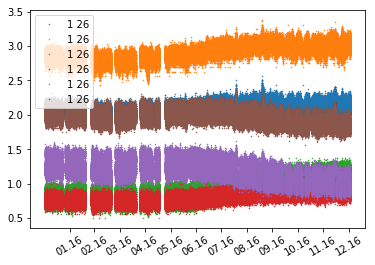

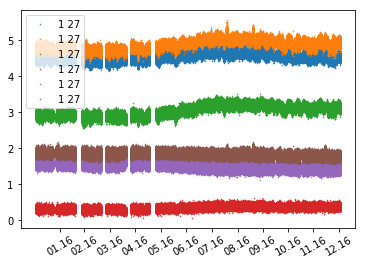

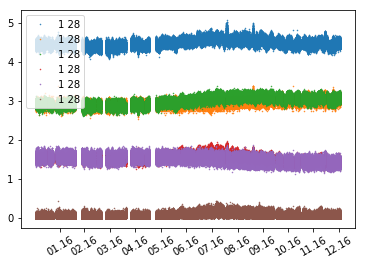

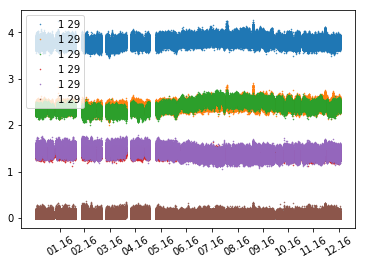

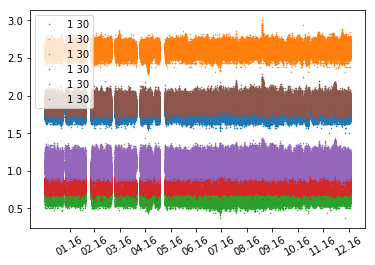

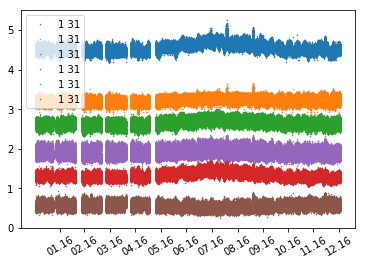

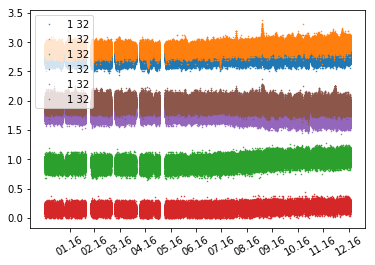

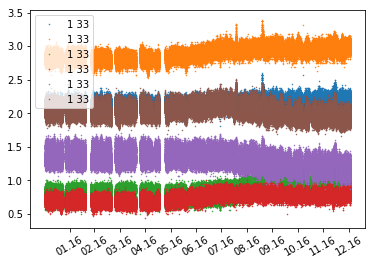

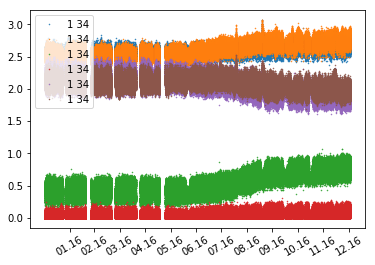

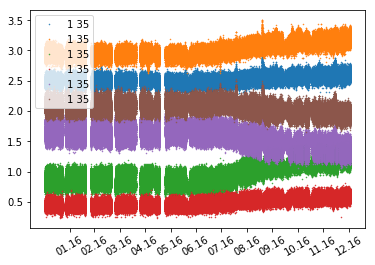

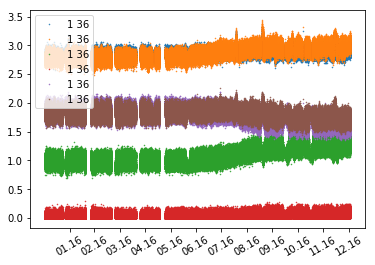

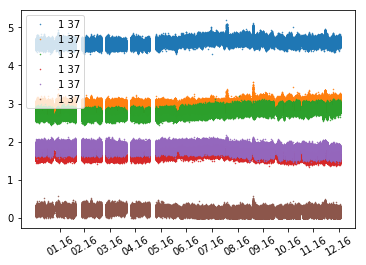

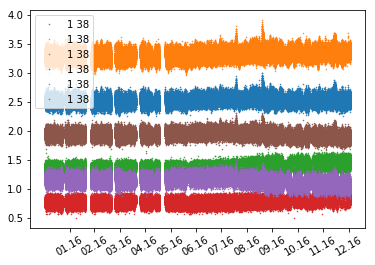

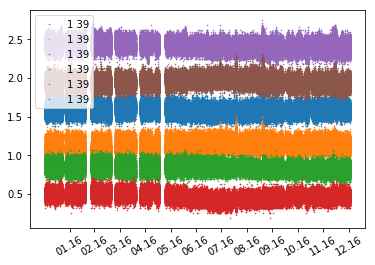

In [5]:
for j in tqdm(range(40)):
    plt.figure()
    k_0 = j*4 + 0
    k_1 = j*4 + 1
    k_2 = j*4 + 2
    k_3 = j*4 + 3
    delta_0_1 = abs(temp[:, k_0] - temp[:, k_1])
    delta_0_2 = abs(temp[:, k_0] - temp[:, k_2])
    delta_0_3 = abs(temp[:, k_0] - temp[:, k_3])
    delta_1_2 = abs(temp[:, k_1] - temp[:, k_2])
    delta_1_3 = abs(temp[:, k_1] - temp[:, k_3])
    delta_2_3 = abs(temp[:, k_2] - temp[:, k_3])
    
#     delta_mean_0_1 = np.mean(delta_0_1)
#     delta_mean_0_2 = np.mean(delta_0_2)
#     delta_mean_0_3 = np.mean(delta_0_3)
#     delta_mean_1_2= np.mean(delta_1_2)
#     delta_mean_1_3 = np.mean(delta_1_3)
#     delta_mean_2_3 = np.mean(delta_2_3)
    
    delta_std_0_1 = np.std(delta_0_1)
    delta_std_0_2 = np.std(delta_0_2)
    delta_std_0_3 = np.std(delta_0_3)
    delta_std_1_2 = np.std(delta_1_2)
    delta_std_1_3 = np.std(delta_1_3)
    delta_std_2_3 = np.std(delta_2_3)
    
#     res_0_1 = delta_0_1-delta_mean_0_1
#     res_0_2 = delta_0_2-delta_mean_0_2
#     res_0_3 = delta_0_3-delta_mean_0_3
#     res_1_2 = delta_1_2-delta_mean_1_2
#     res_1_3 = delta_1_3-delta_mean_1_3
#     res_2_3 = delta_2_3-delta_mean_2_3

#     print(min(res_0_1), max(res_0_1))
#     print(min(res_0_2), max(res_0_2))
#     print(min(res_0_3), max(res_0_3))
#     print(min(res_1_2), max(res_1_2))
#     print(min(res_1_3), max(res_1_3))
#     print(min(res_2_3), max(res_2_3))

#     print(delta_std_0_1)
#     print(delta_std_0_2)
#     print(delta_std_0_3)
#     print(delta_std_1_2)
#     print(delta_std_1_3)
#     print(delta_std_2_3)
    
    plt.plot(datetime, delta_0_1, '.', ms=1, label=str(1)+' '+str(j))
    plt.plot(datetime, delta_0_2, '.', ms=1, label=str(1)+' '+str(j))
    plt.plot(datetime, delta_0_3, '.', ms=1, label=str(1)+' '+str(j))
    plt.plot(datetime, delta_1_2, '.', ms=1, label=str(1)+' '+str(j))
    plt.plot(datetime, delta_1_3, '.', ms=1, label=str(1)+' '+str(j))
    plt.plot(datetime, delta_2_3, '.', ms=1, label=str(1)+' '+str(j))
    timeLabel = pd.date_range(start=start_date, end=end_date, freq="M")
    plt.xticks(timeLabel, timeLabel, rotation=30)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%m.%y"))
    plt.legend(loc='upper left')

  4%|▍         | 15/366 [00:03<01:02,  5.60it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/01/14/20160114.FAD_CONTROL_TEMPERATURE.fits'


  6%|▋         | 23/366 [00:05<02:27,  2.32it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/01/22/20160122.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/01/23/20160123.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/01/24/20160124.FAD_CONTROL_TEMPERATURE.fits'


  8%|▊         | 31/366 [00:07<01:10,  4.74it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/01/30/20160130.FAD_CONTROL_TEMPERATURE.fits'


 12%|█▏        | 45/366 [00:12<02:08,  2.49it/s]/swdev_nfs/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 14%|█▍        | 52/366 [00:13<01:11,  4.38it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/18/20160218.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/19/20160219.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/20/20160220.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/21/20160221.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/22/20160222.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/23/20160223.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/02/24/20160224.FAD_CONTROL_TEMPERATURE.fits'


 22%|██▏       | 82/366 [00:25<01:03,  4.48it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/20/20160320.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/21/20160321.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/22/20160322.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/23/20160323.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/24/20160324.FAD_CONTROL_TEMPERATURE.fits'


 25%|██▍       | 91/366 [00:27<01:21,  3.39it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/03/30/20160330.FAD_CONTROL_TEMPERATURE.fits'


 31%|███       | 112/366 [00:32<01:09,  3.66it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/04/19/20160419.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/04/20/20160420.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/04/22/20160422.FAD_CONTROL_TEMPERATURE.fits'


 31%|███▏      | 115/366 [00:32<00:53,  4.67it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/04/23/20160423.FAD_CONTROL_TEMPERATURE.fits'


 35%|███▌      | 129/366 [00:37<01:06,  3.55it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/09/20160509.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/10/20160510.FAD_CONTROL_TEMPERATURE.fits'


 39%|███▊      | 141/366 [00:38<00:31,  7.05it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/17/20160517.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/18/20160518.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/19/20160519.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/20/20160520.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/21/20160521.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/22/20160522.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/05/23/20160523.FAD_CONTROL_TEMPERATURE.fits'


 63%|██████▎   | 229/366 [00:59<00:27,  5.07it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/08/15/20160815.FAD_CONTROL_TEMPERATURE.fits'


 64%|██████▎   | 233/366 [01:01<00:55,  2.41it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/08/19/20160819.FAD_CONTROL_TEMPERATURE.fits'


 79%|███████▉  | 289/366 [01:28<00:27,  2.84it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/10/13/20161013.FAD_CONTROL_TEMPERATURE.fits'
[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/10/14/20161014.FAD_CONTROL_TEMPERATURE.fits'


 81%|████████▏ | 298/366 [01:30<00:12,  5.27it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/10/23/20161023.FAD_CONTROL_TEMPERATURE.fits'


 85%|████████▌ | 312/366 [01:35<00:41,  1.32it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/11/06/20161106.FAD_CONTROL_TEMPERATURE.fits'


 87%|████████▋ | 317/366 [01:38<00:34,  1.43it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/11/13/20161113.FAD_CONTROL_TEMPERATURE.fits'


 88%|████████▊ | 321/366 [01:39<00:19,  2.30it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/11/15/20161115.FAD_CONTROL_TEMPERATURE.fits'


 95%|█████████▍| 346/366 [01:46<00:11,  1.75it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/12/12/20161212.FAD_CONTROL_TEMPERATURE.fits'


 95%|█████████▌| 348/366 [01:46<00:08,  2.18it/s]

[Errno 2] No such file or directory: '/gpfs0/fact/fact-archive/rev_1/aux/2016/12/14/20161214.FAD_CONTROL_TEMPERATURE.fits'


100%|██████████| 366/366 [01:50<00:00,  5.90it/s]


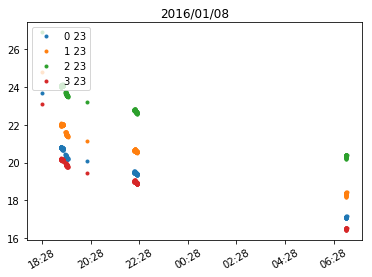

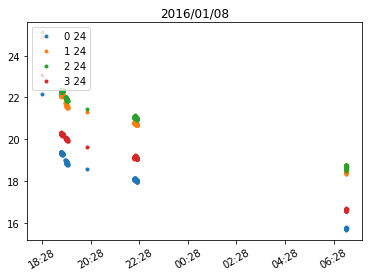

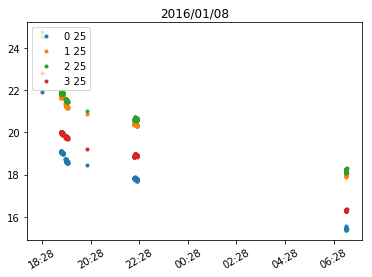

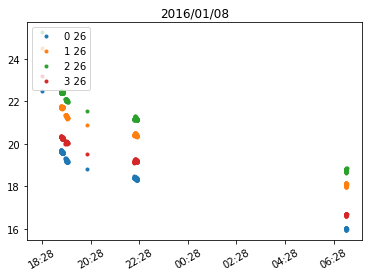

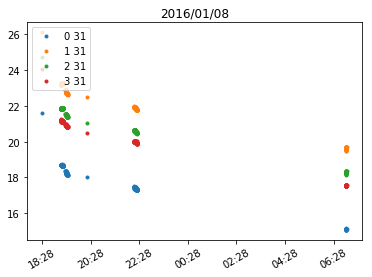

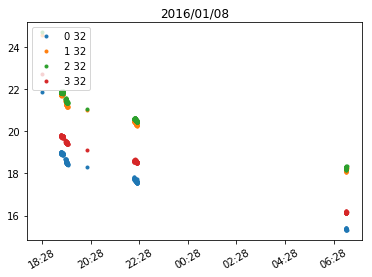

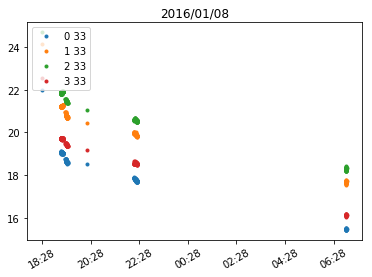

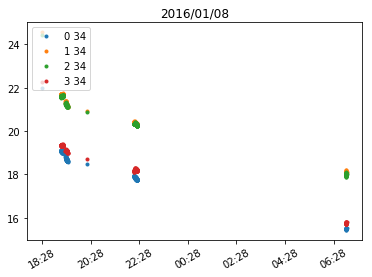

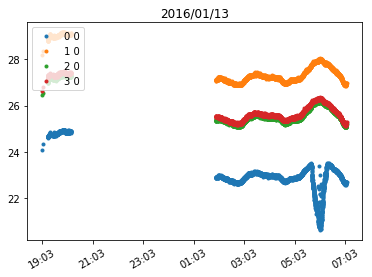

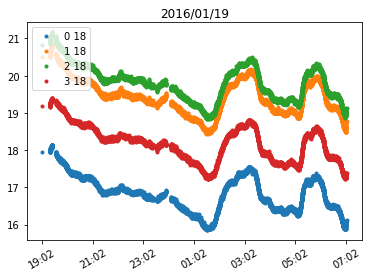

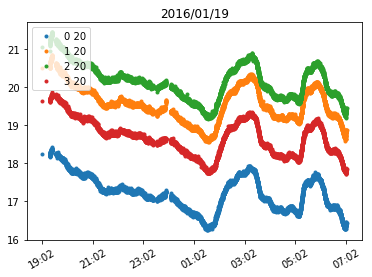

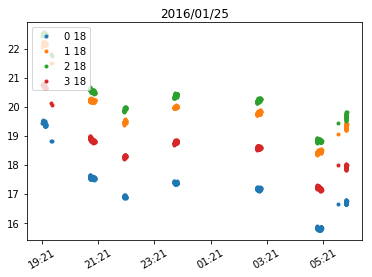

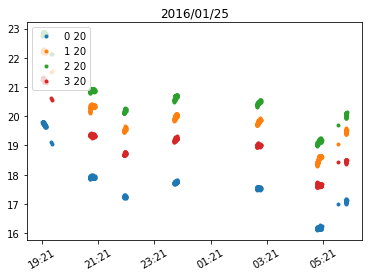

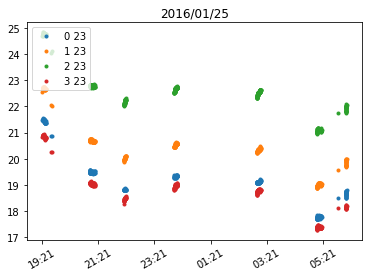

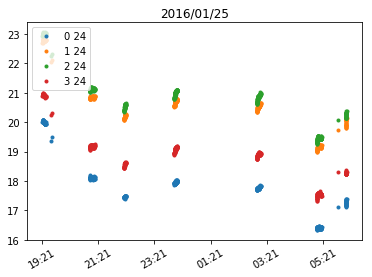

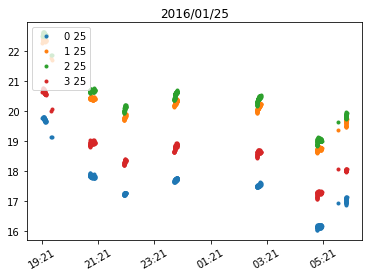

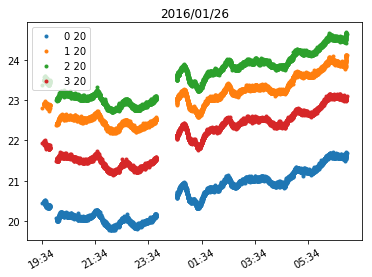

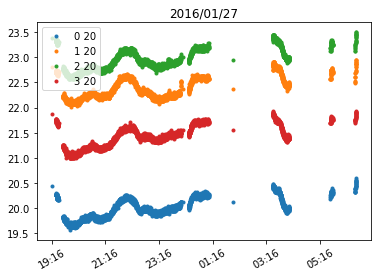

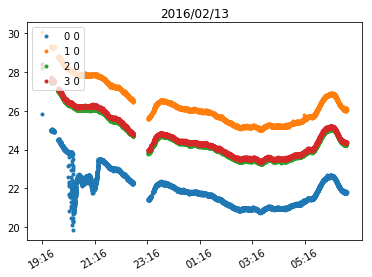

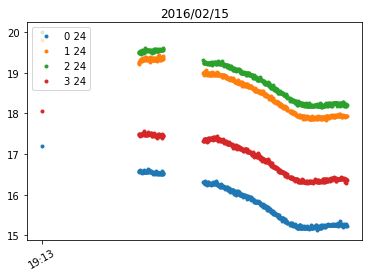

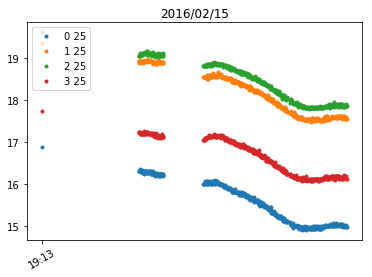

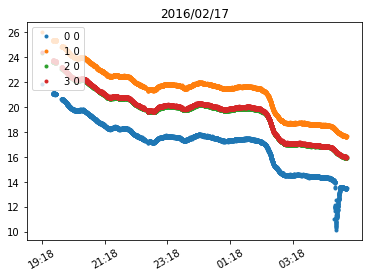

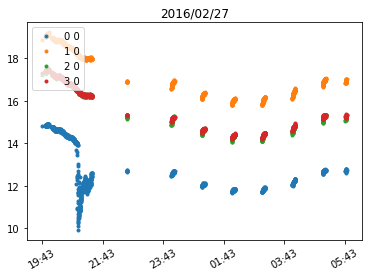

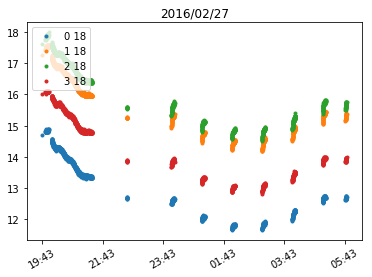

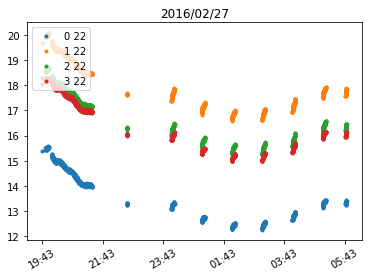

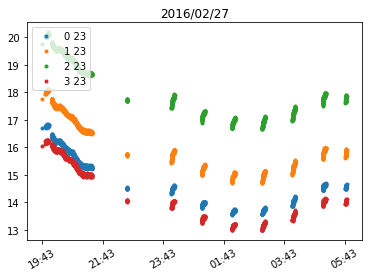

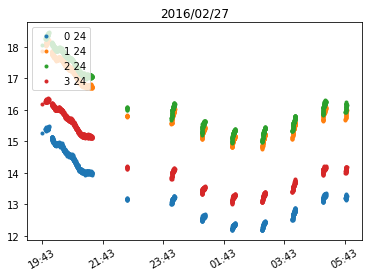

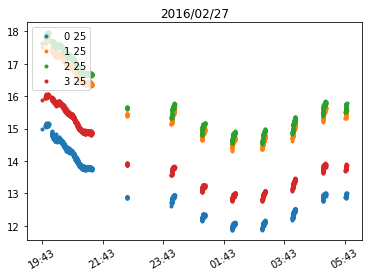

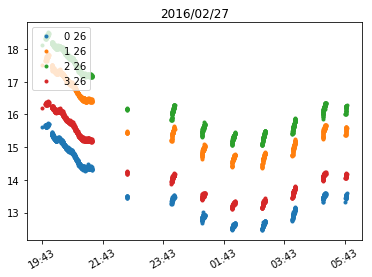

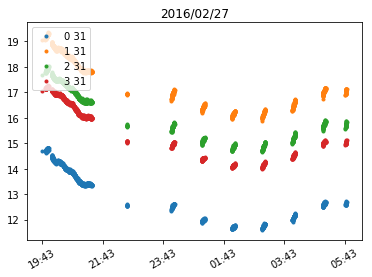

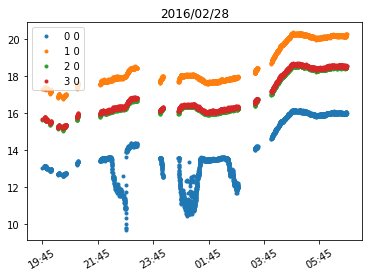

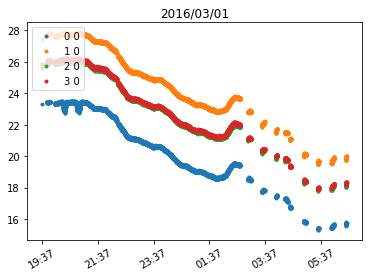

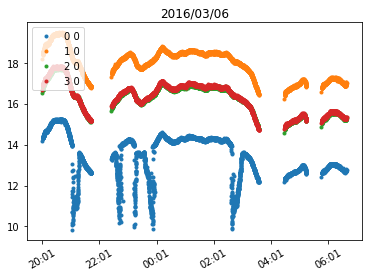

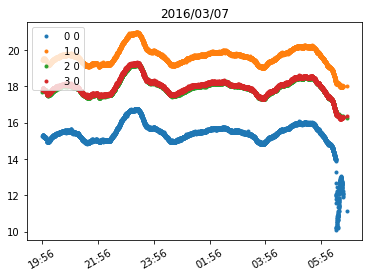

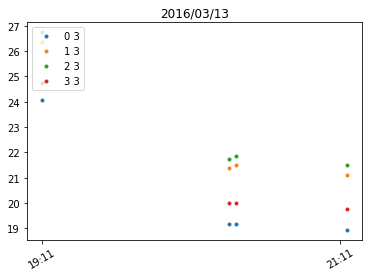

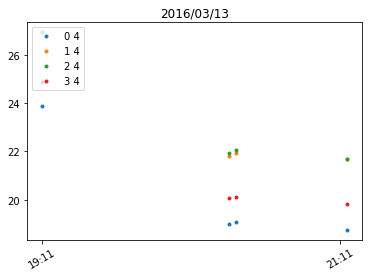

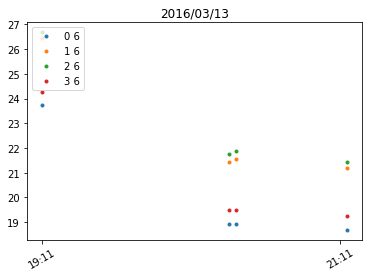

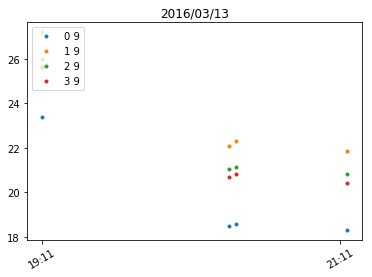

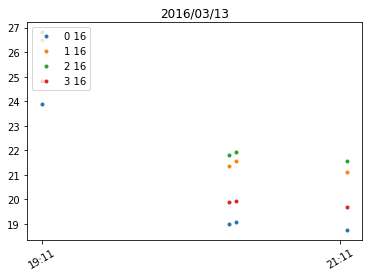

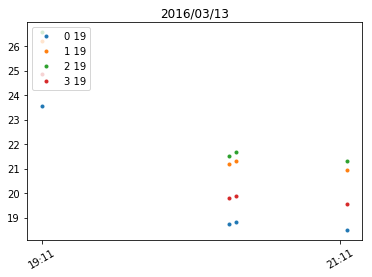

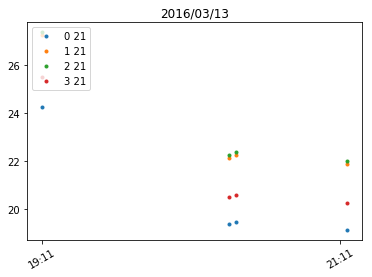

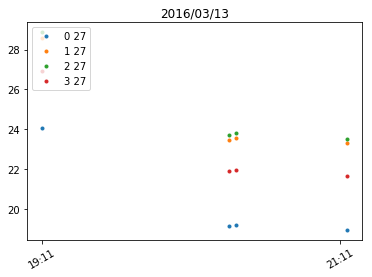

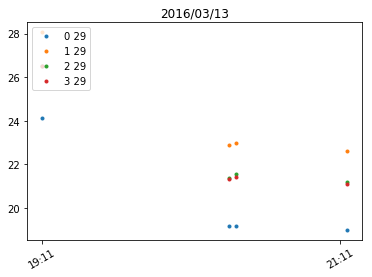

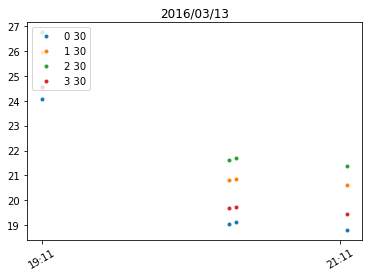

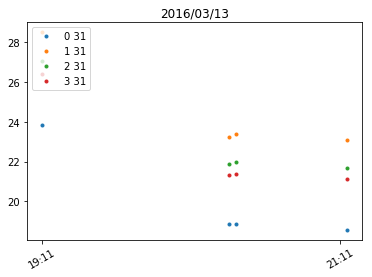

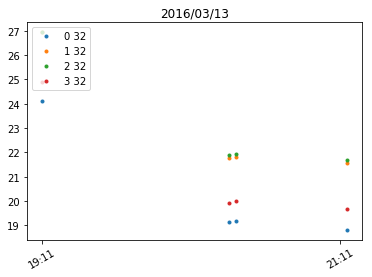

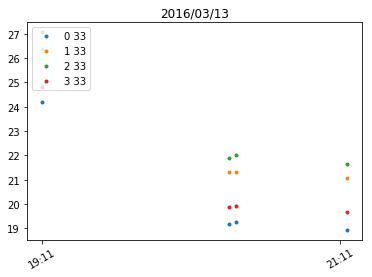

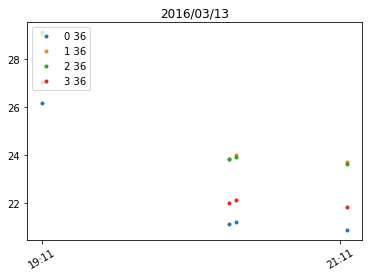

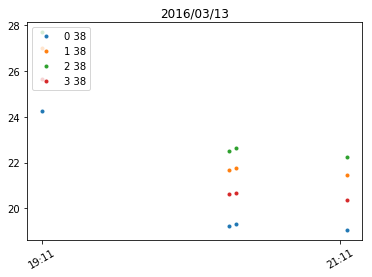

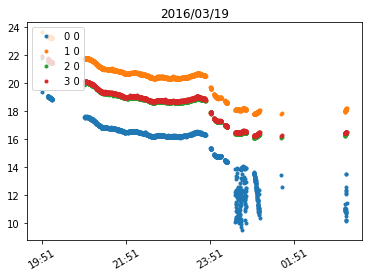

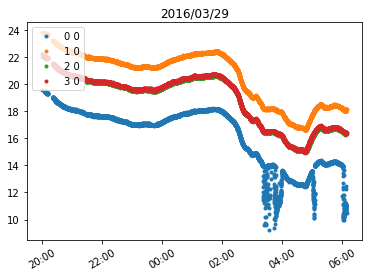

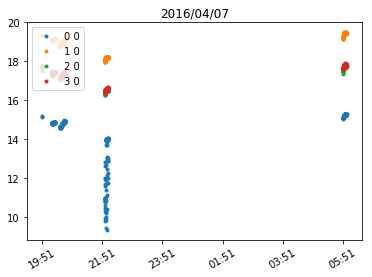

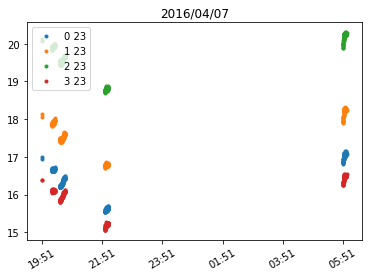

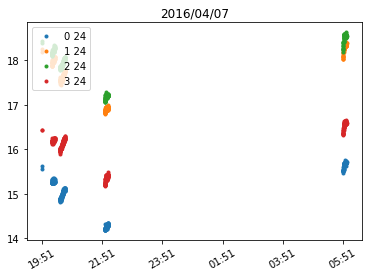

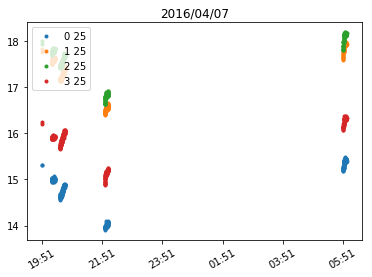

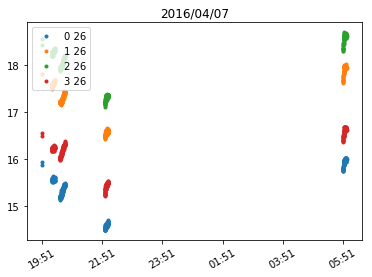

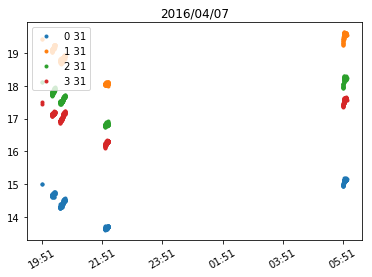

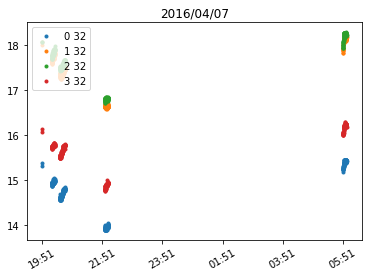

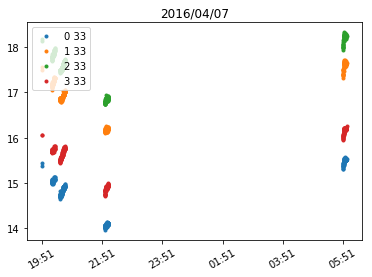

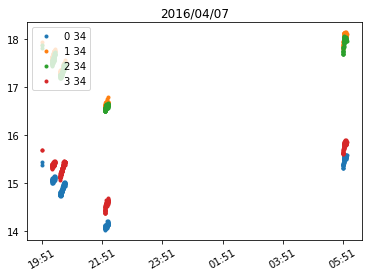

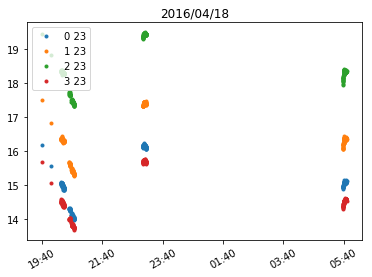

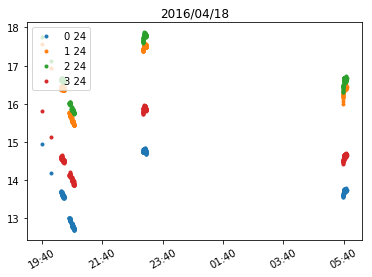

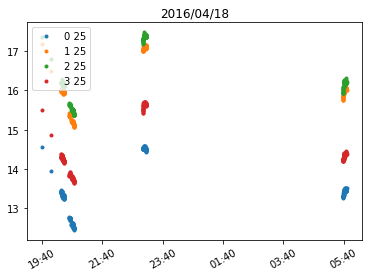

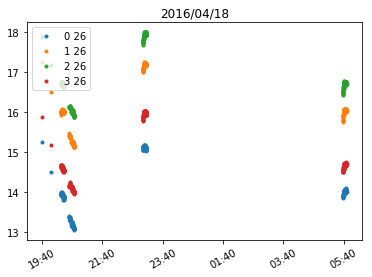

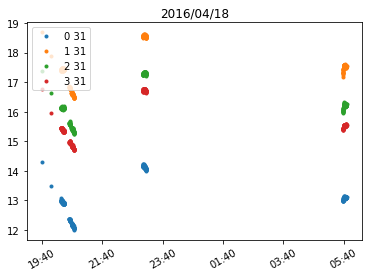

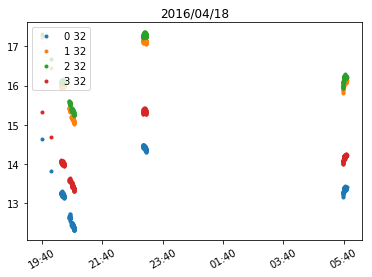

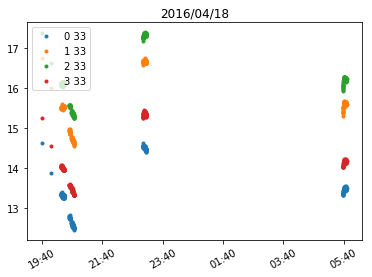

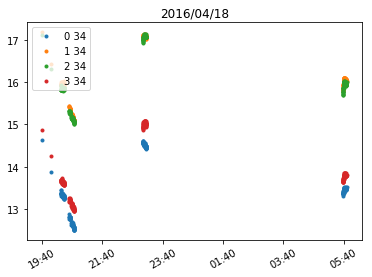

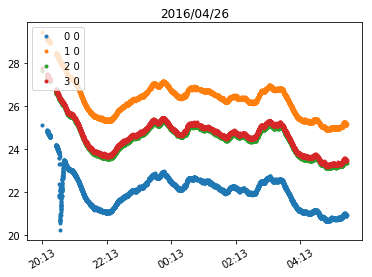

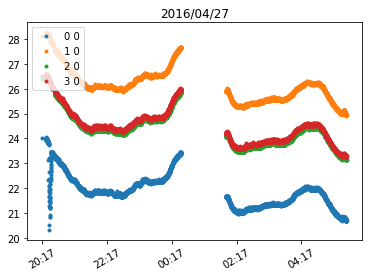

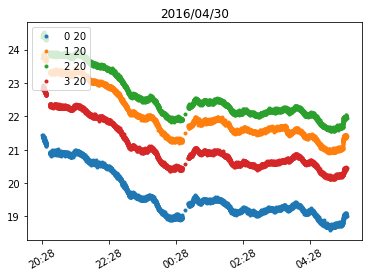

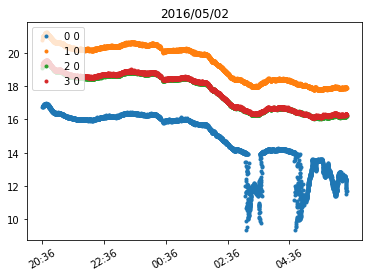

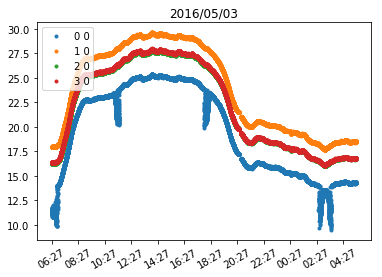

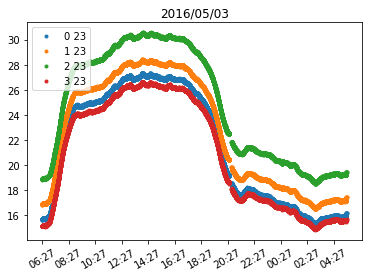

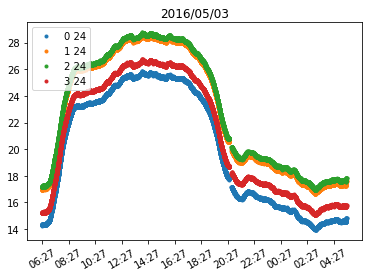

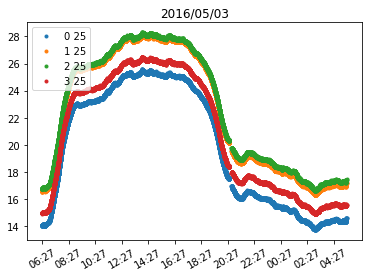

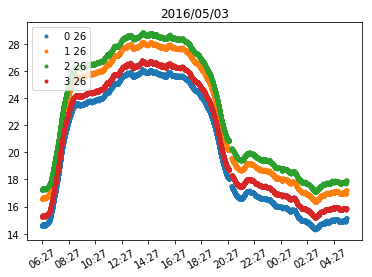

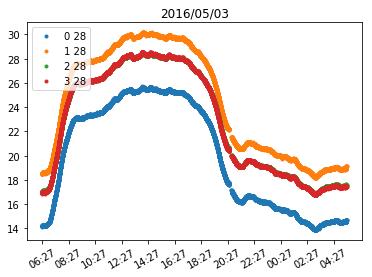

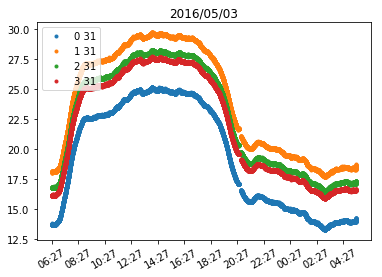

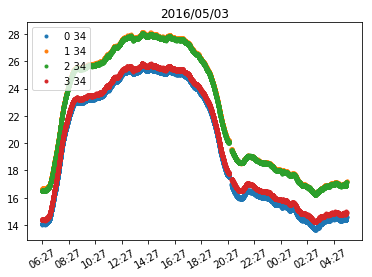

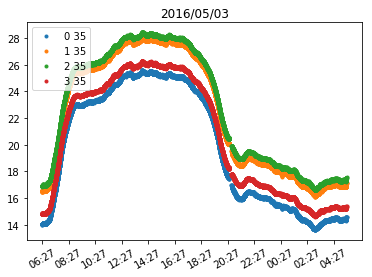

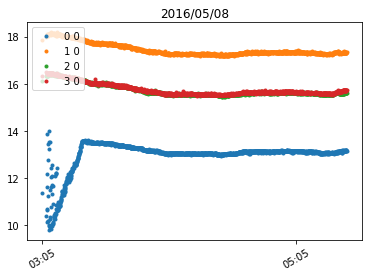

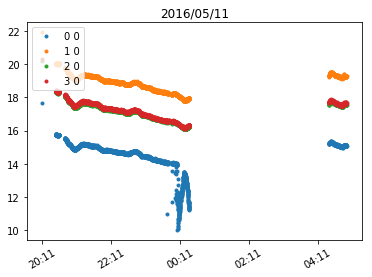

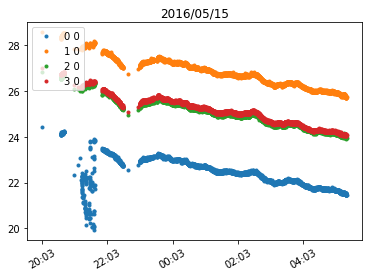

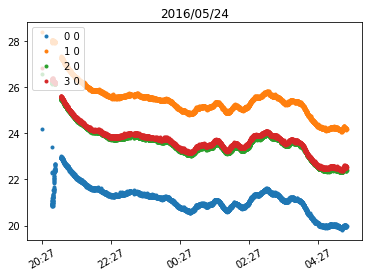

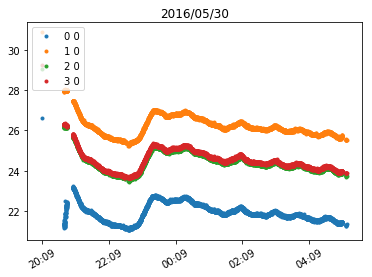

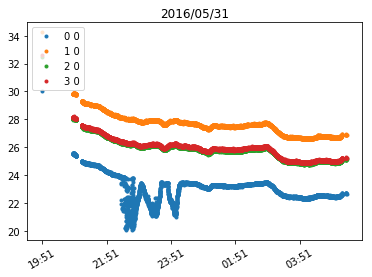

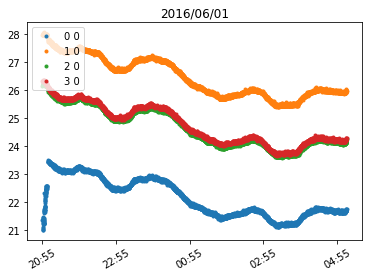

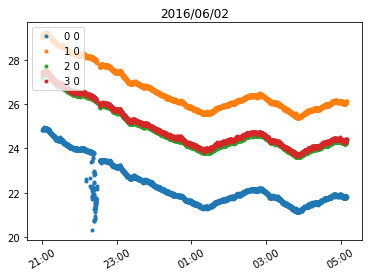

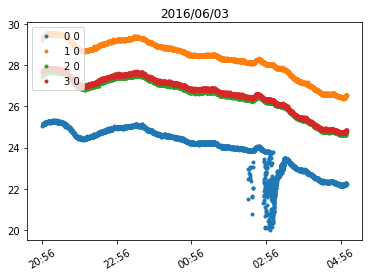

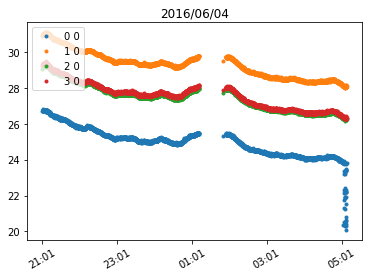

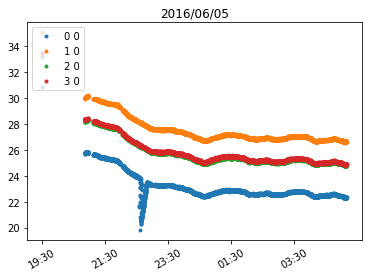

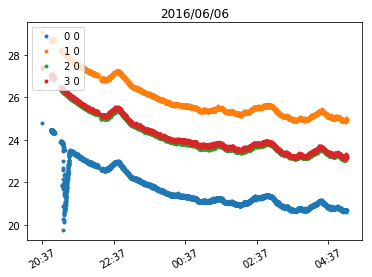

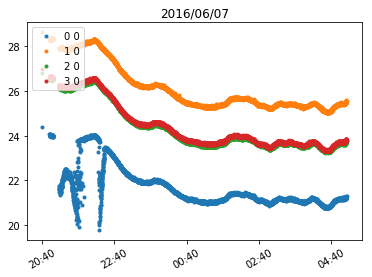

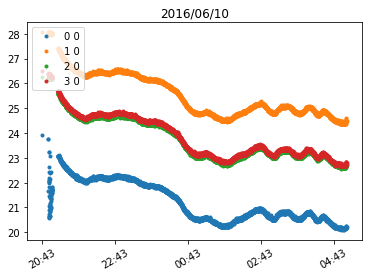

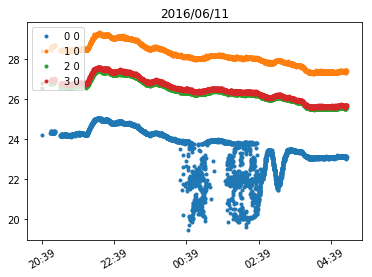

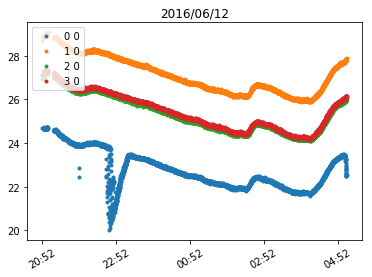

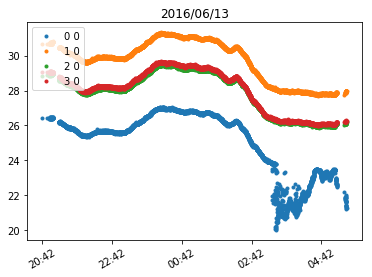

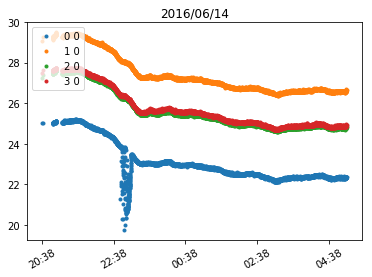

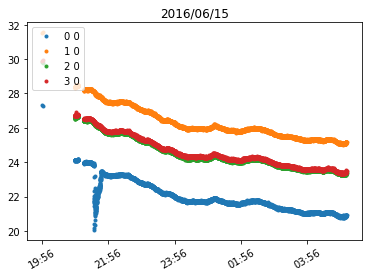

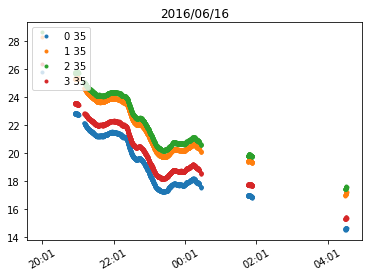

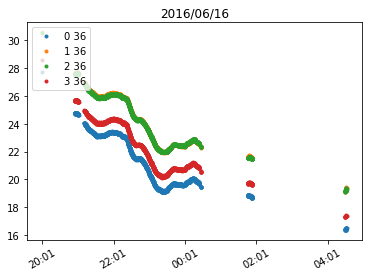

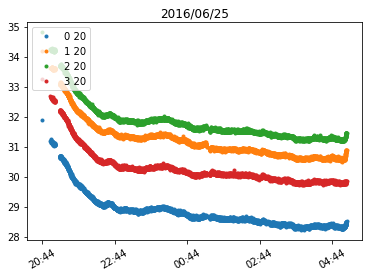

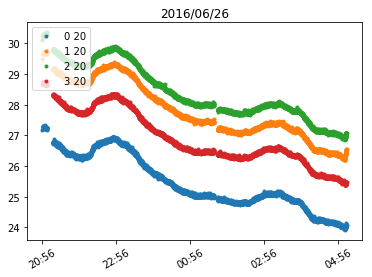

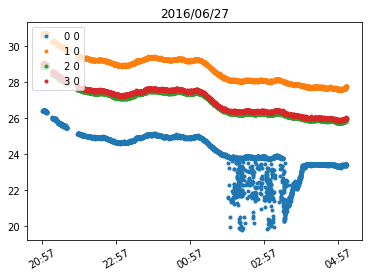

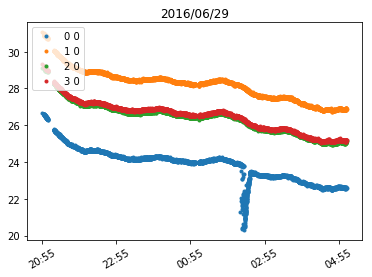

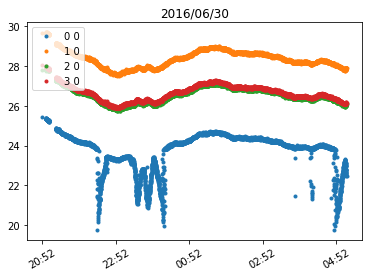

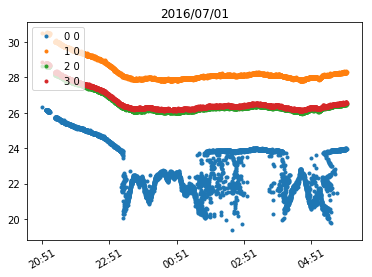

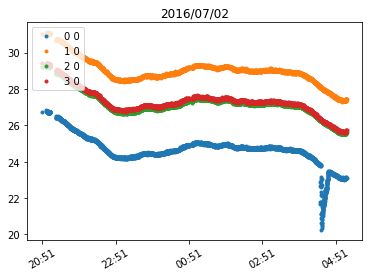

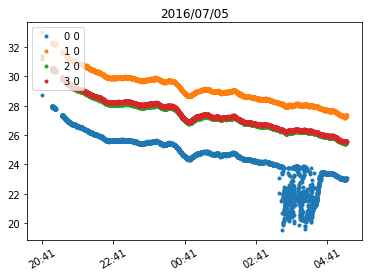

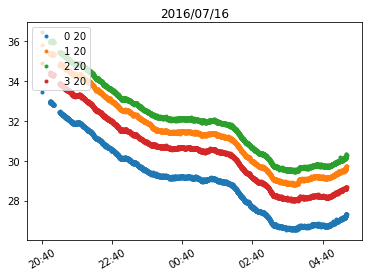

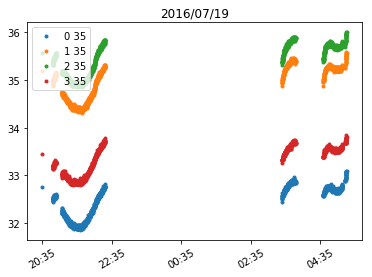

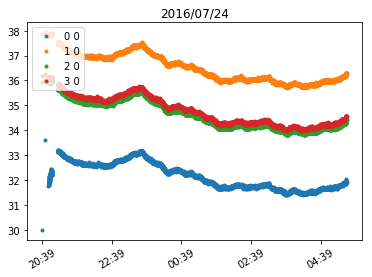

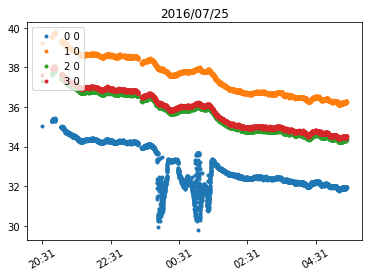

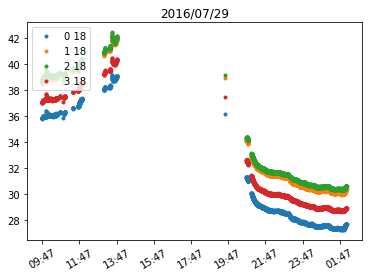

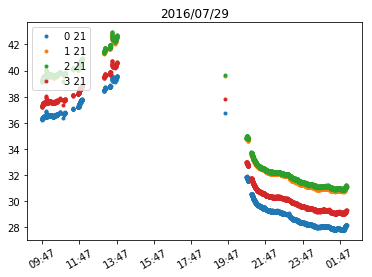

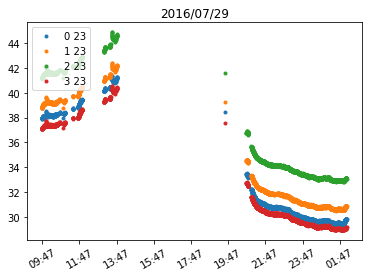

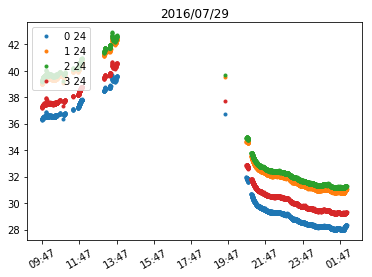

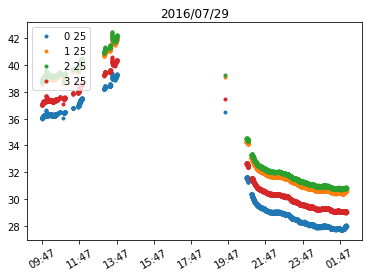

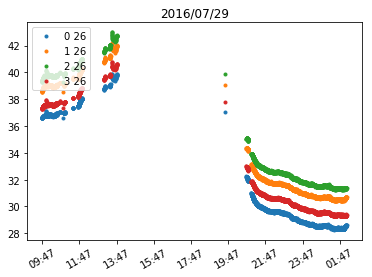

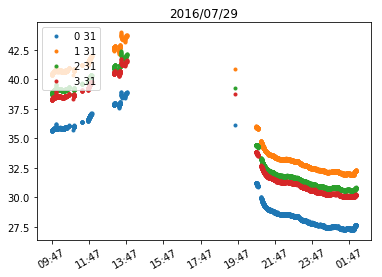

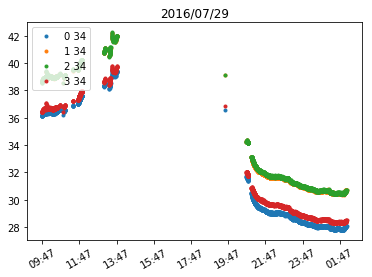

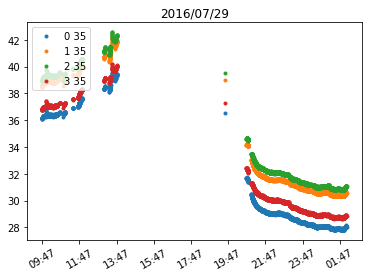

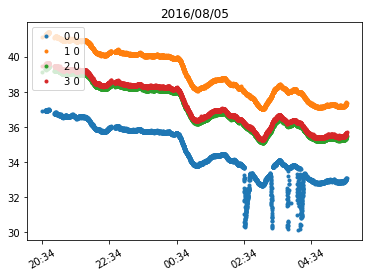

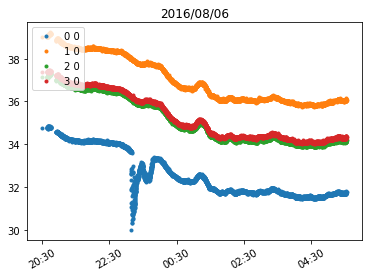

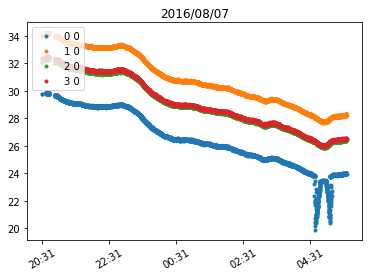

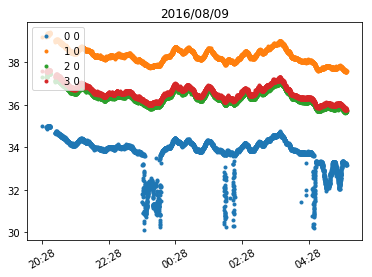

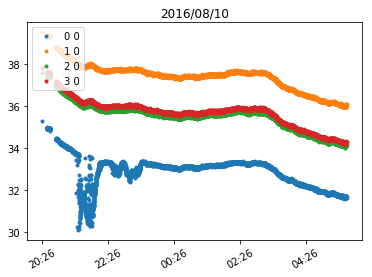

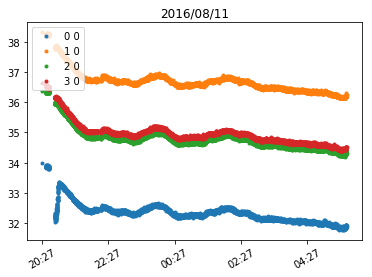

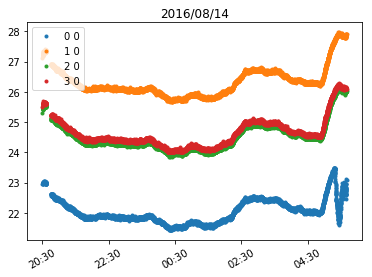

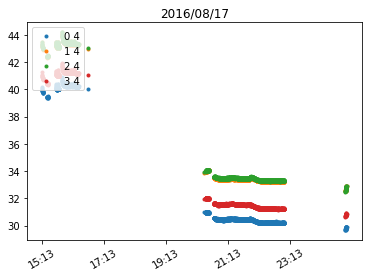

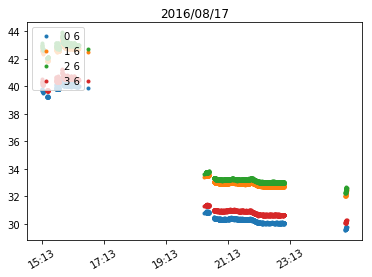

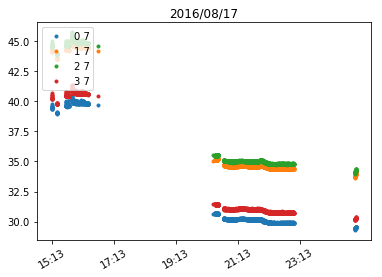

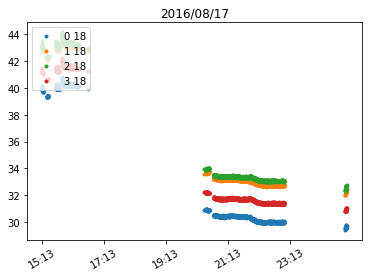

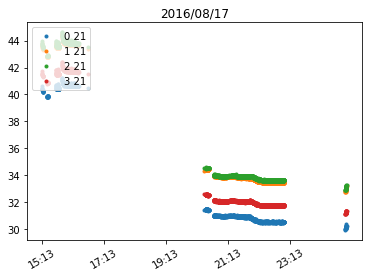

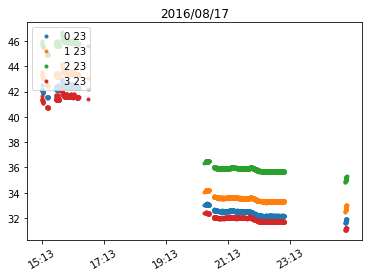

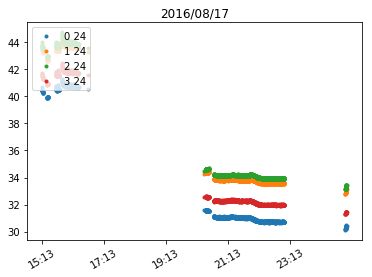

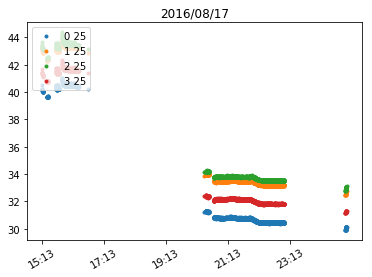

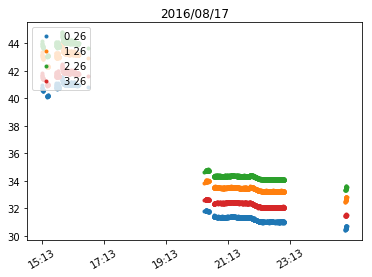

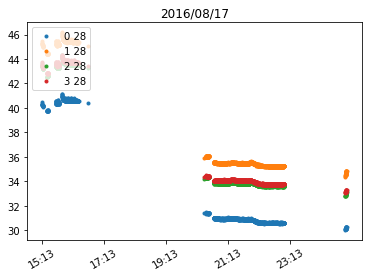

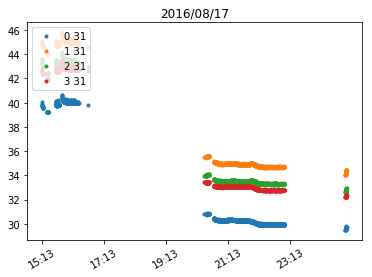

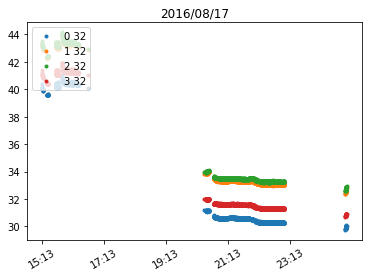

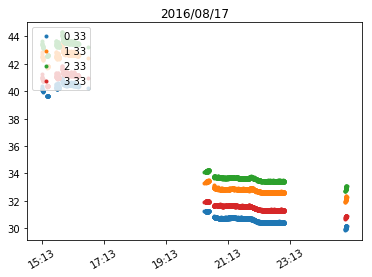

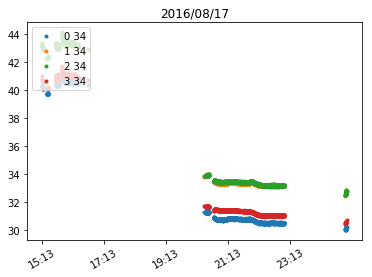

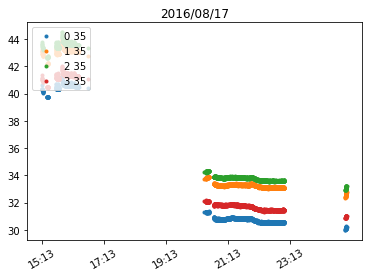

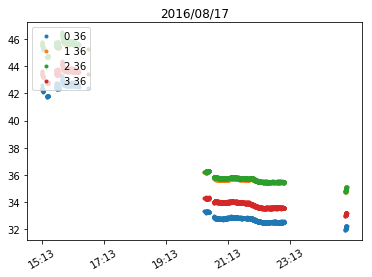

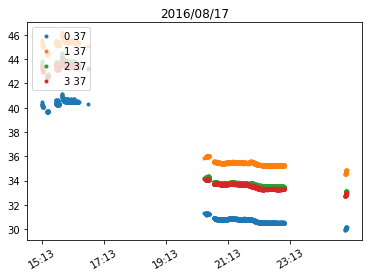

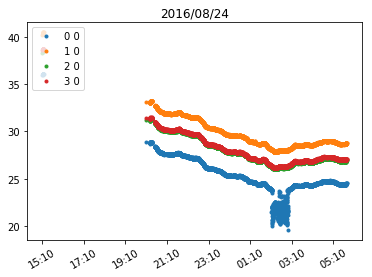

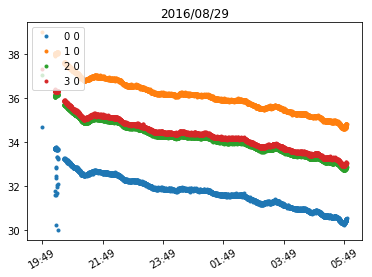

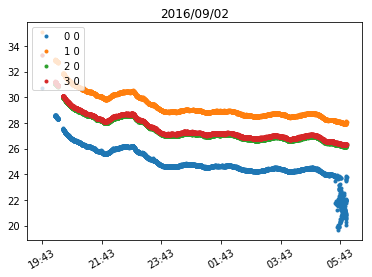

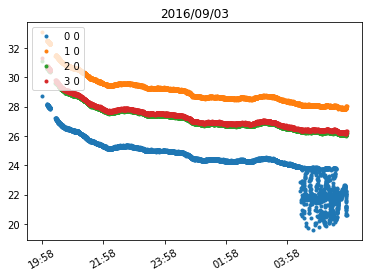

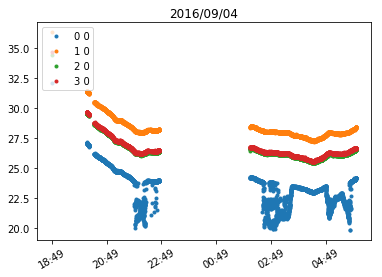

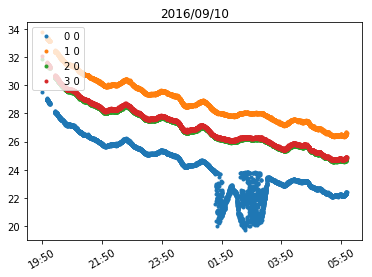

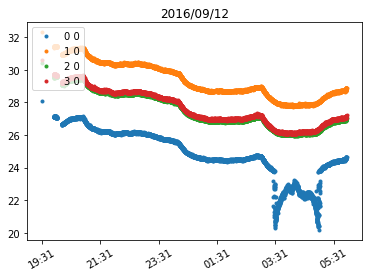

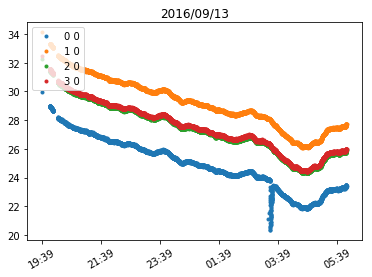

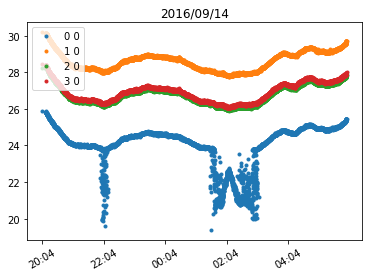

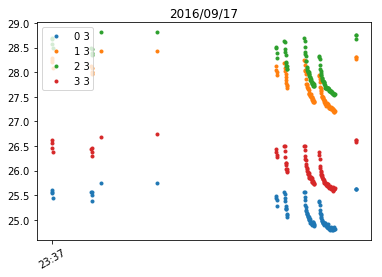

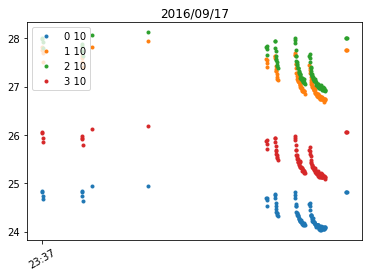

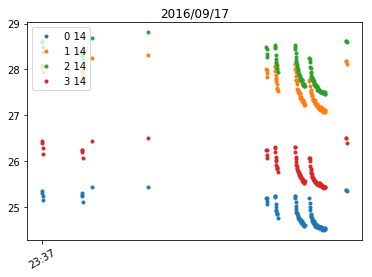

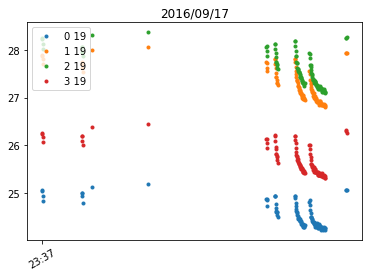

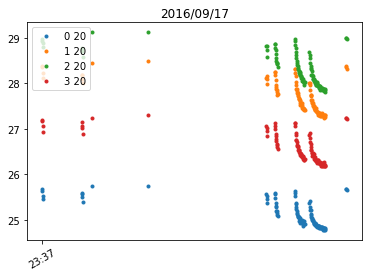

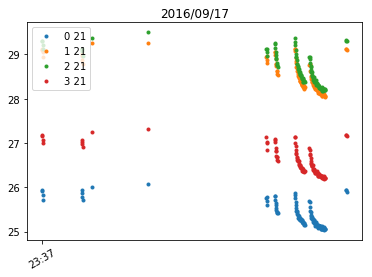

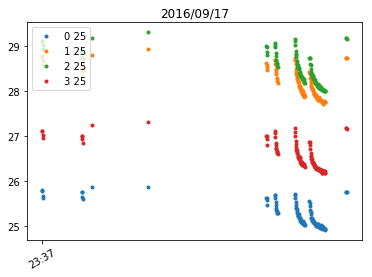

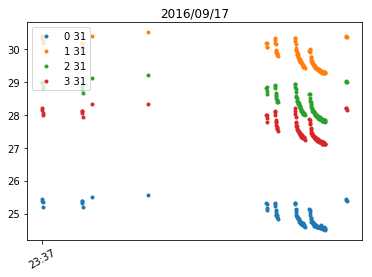

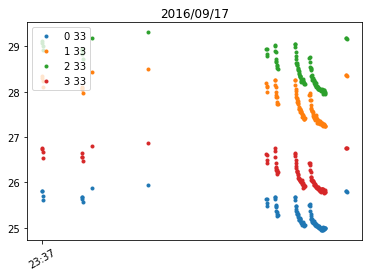

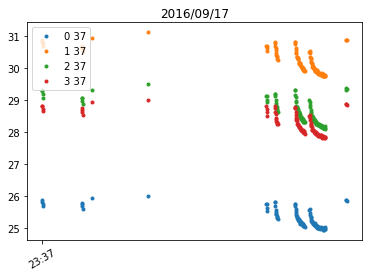

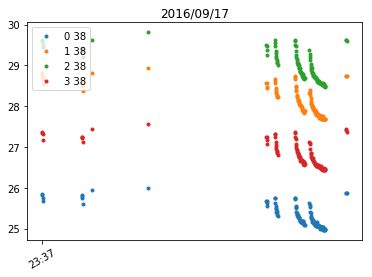

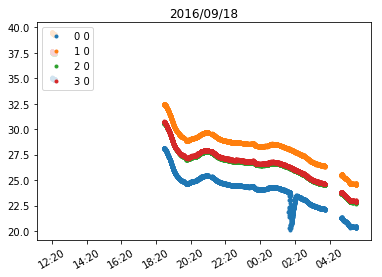

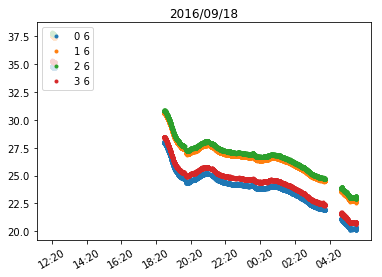

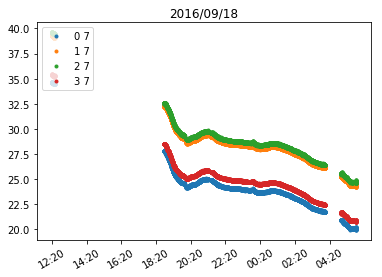

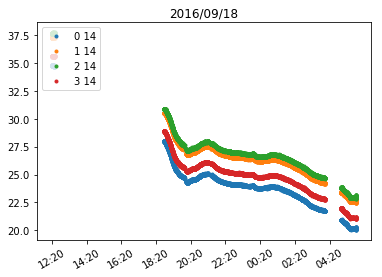

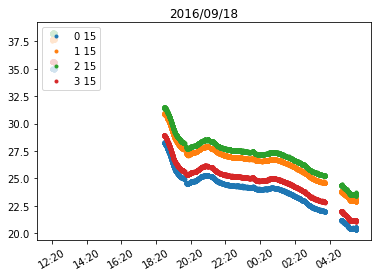

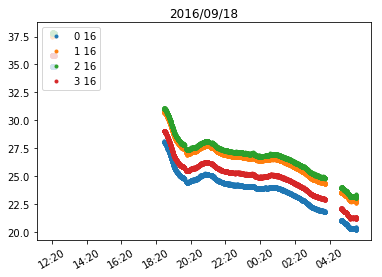

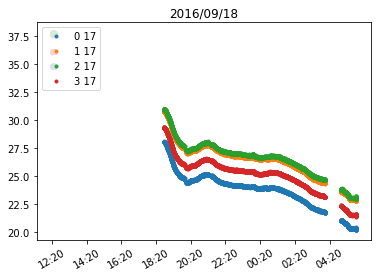

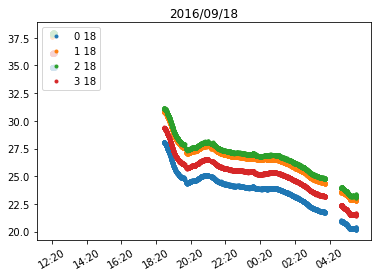

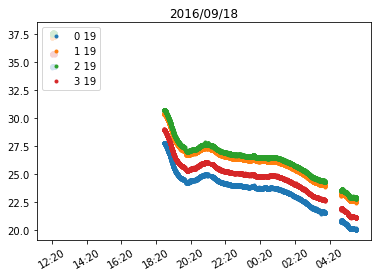

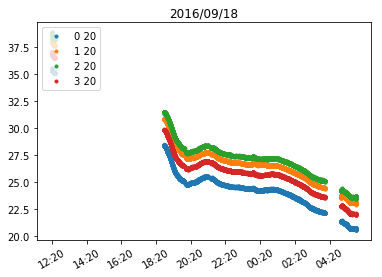

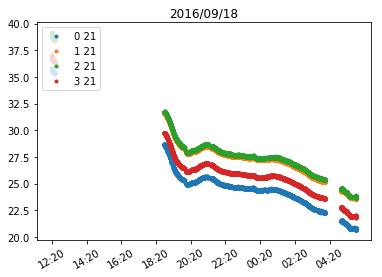

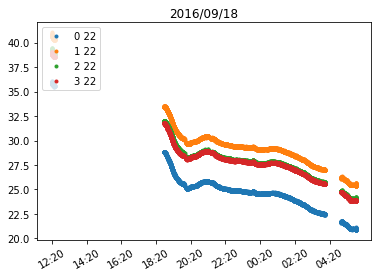

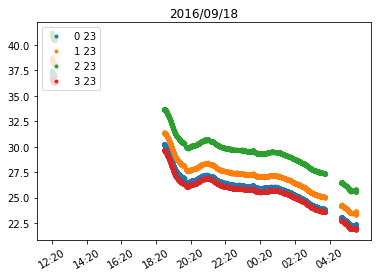

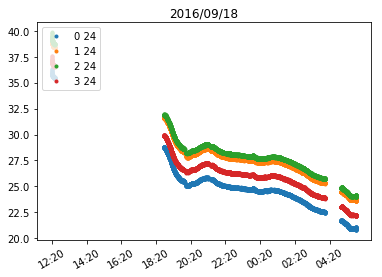

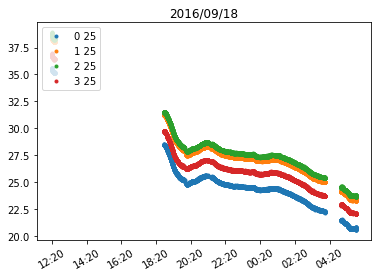

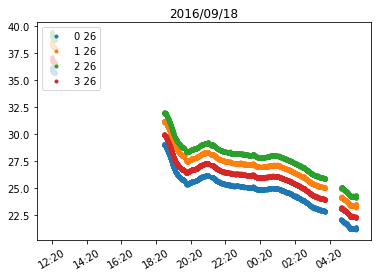

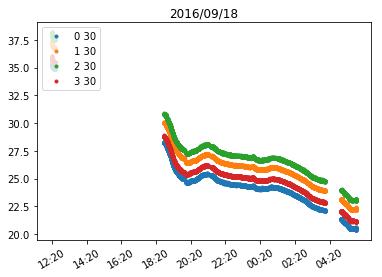

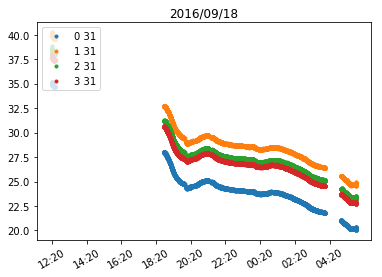

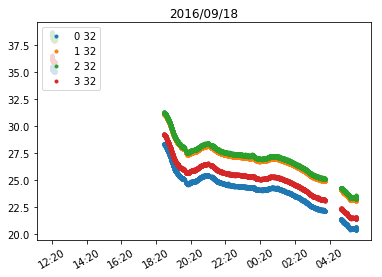

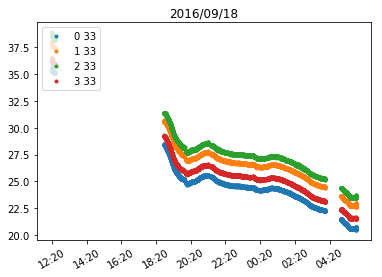

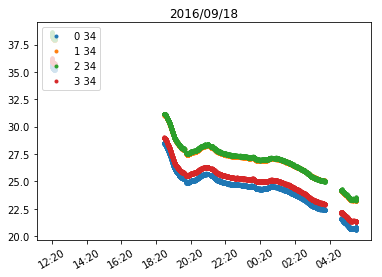

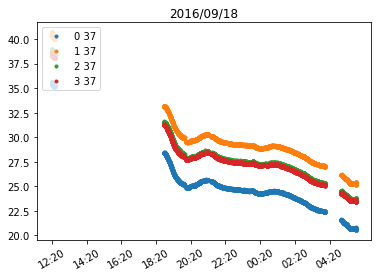

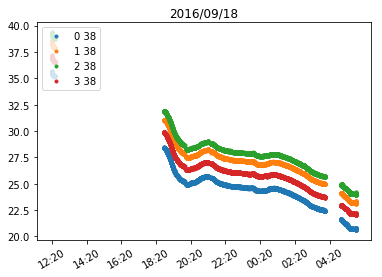

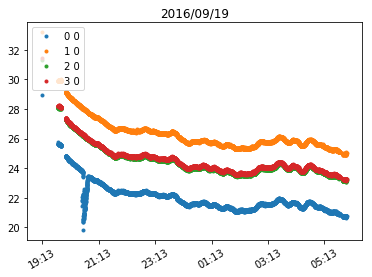

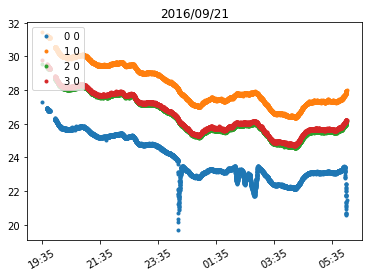

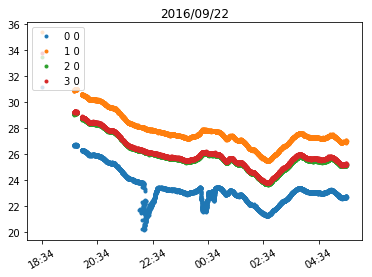

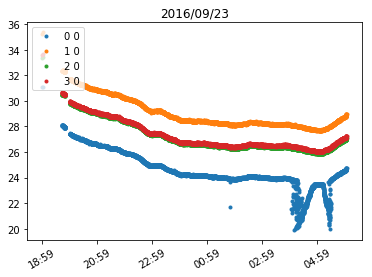

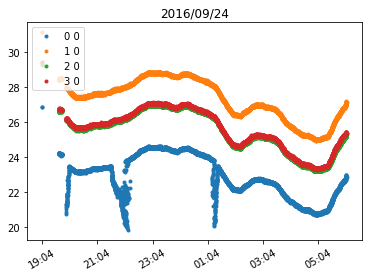

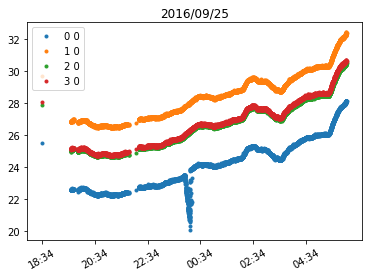

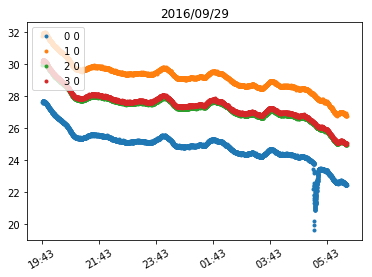

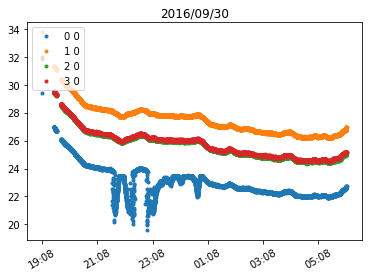

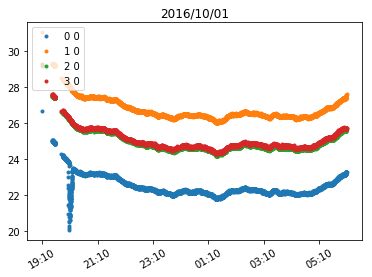

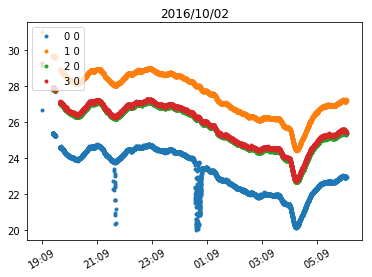

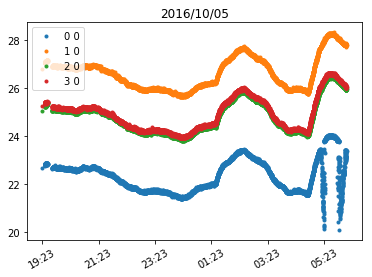

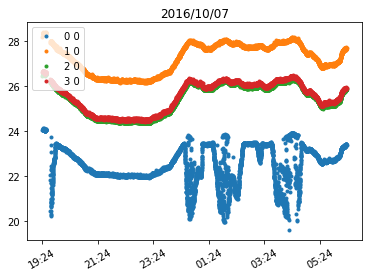

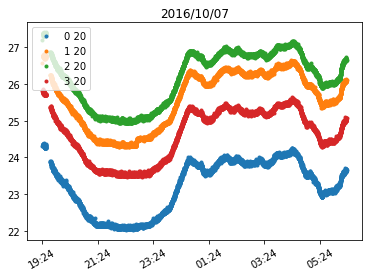

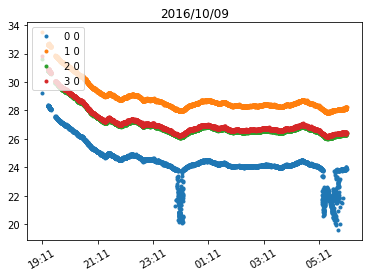

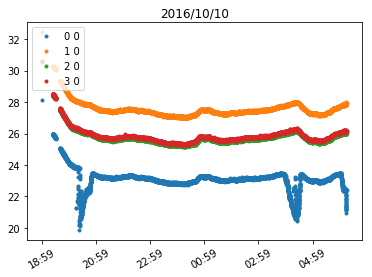

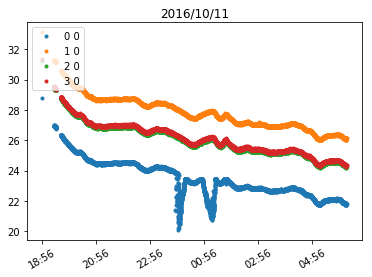

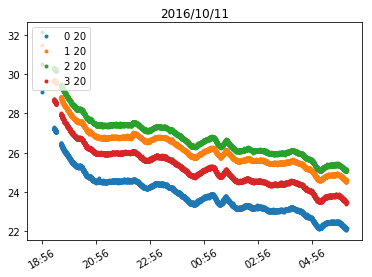

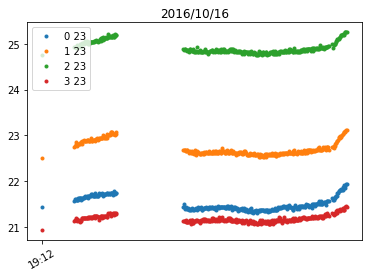

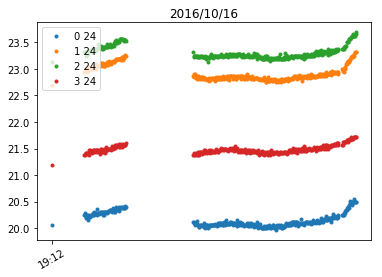

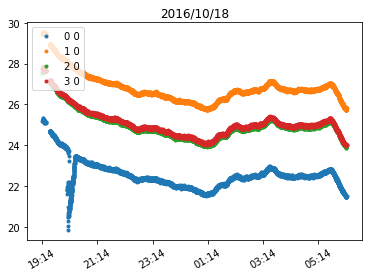

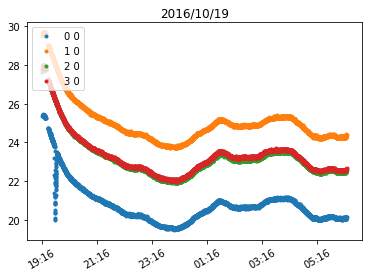

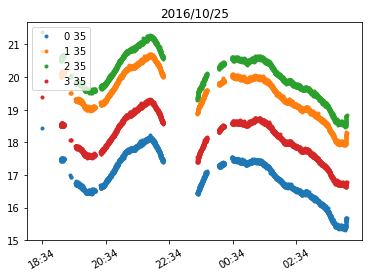

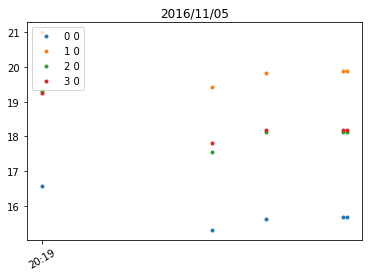

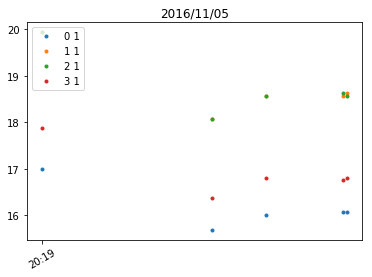

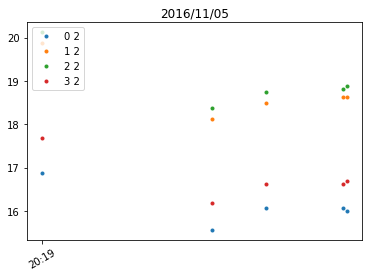

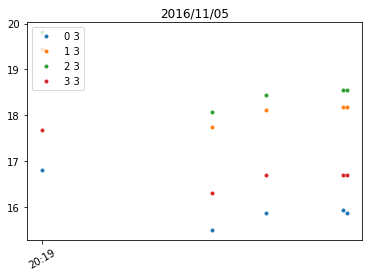

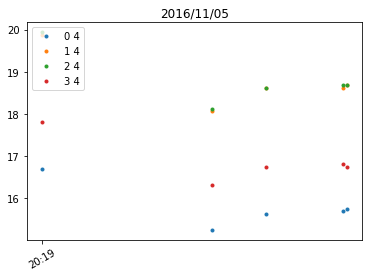

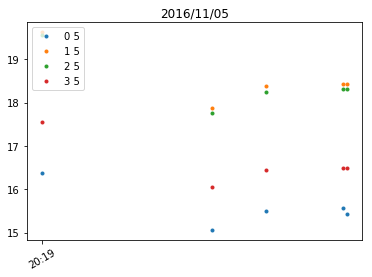

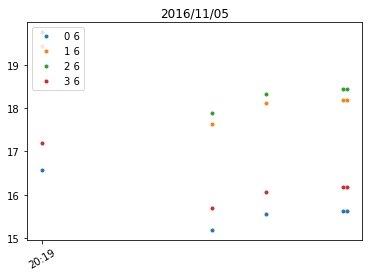

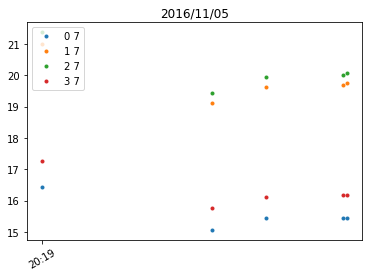

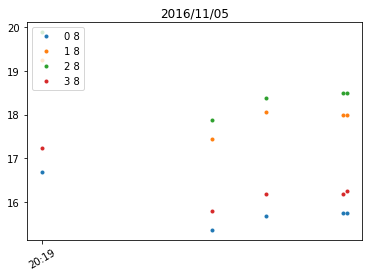

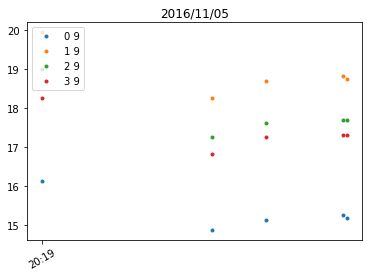

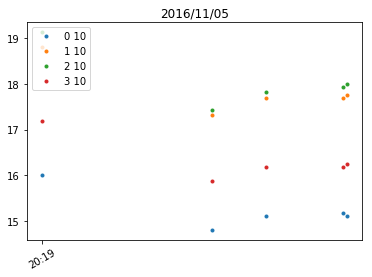

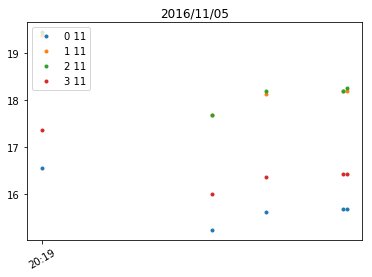

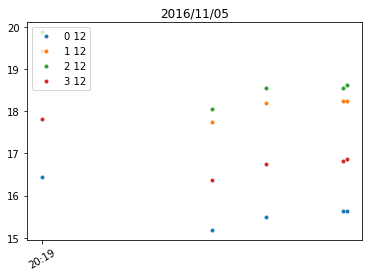

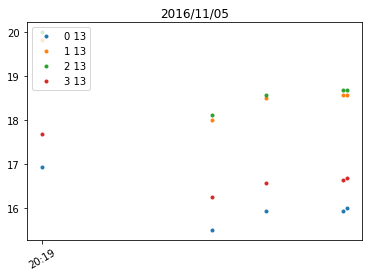

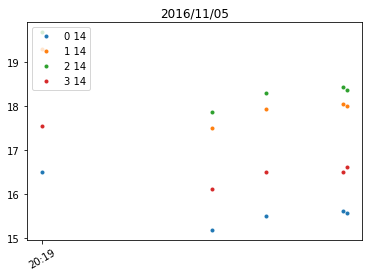

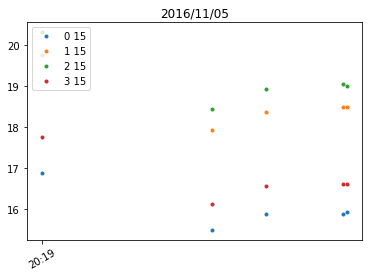

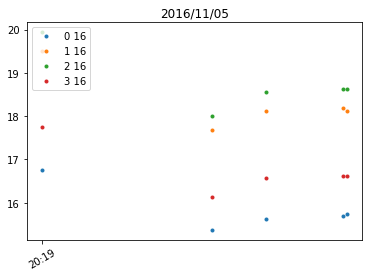

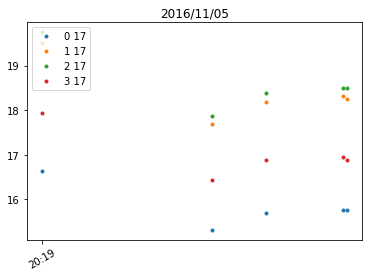

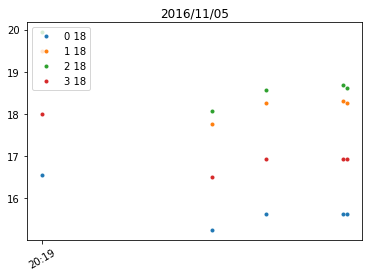

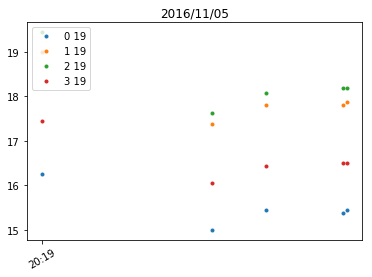

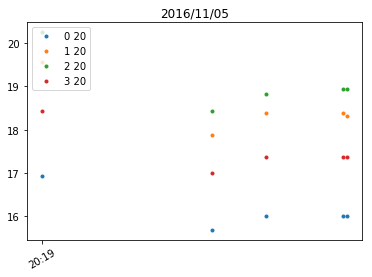

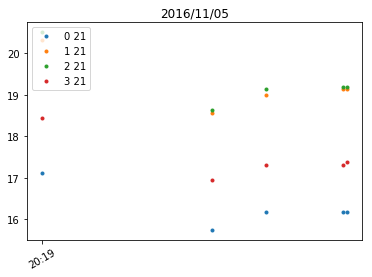

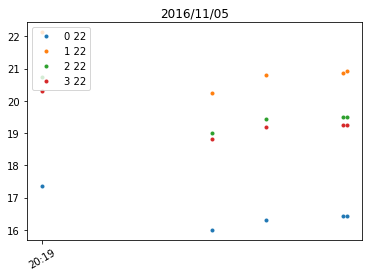

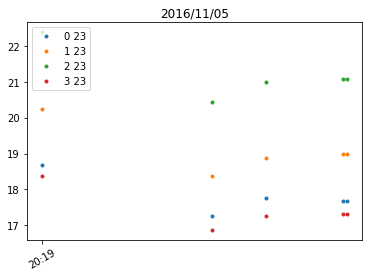

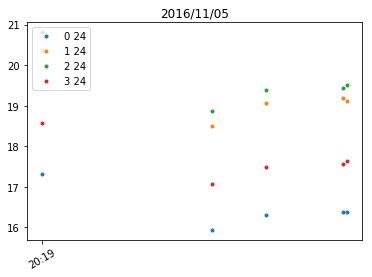

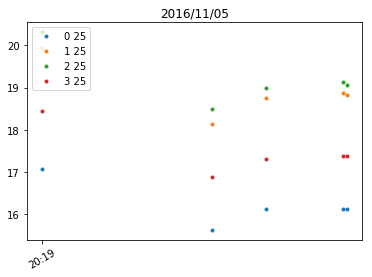

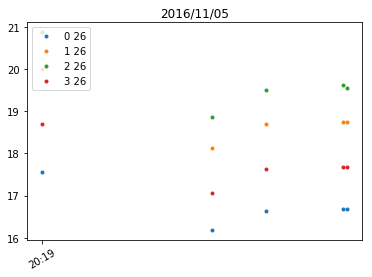

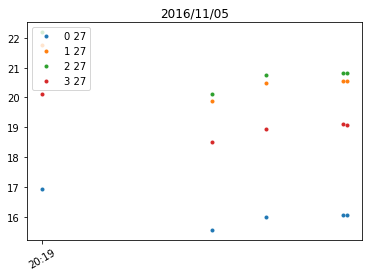

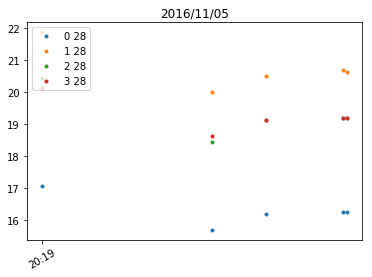

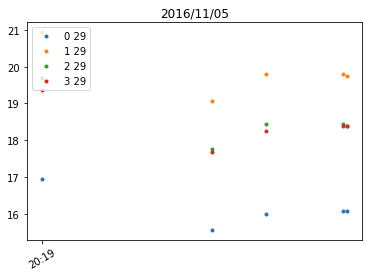

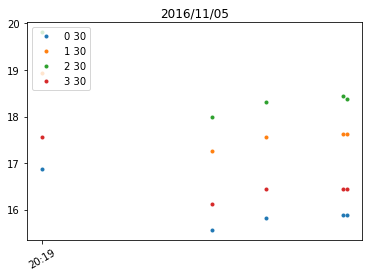

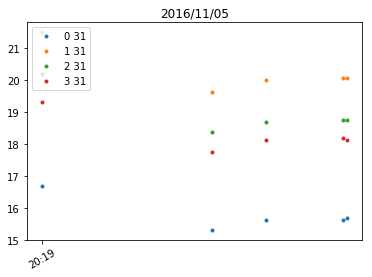

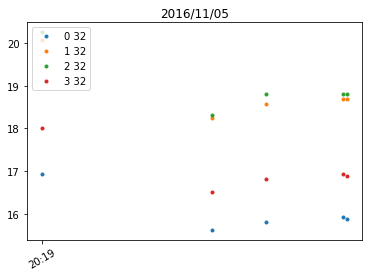

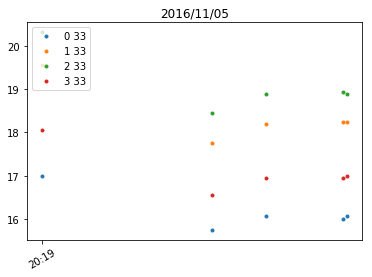

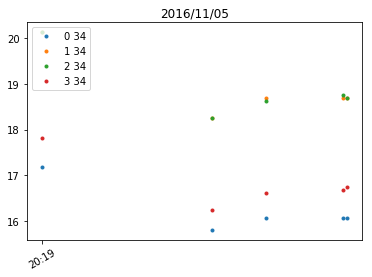

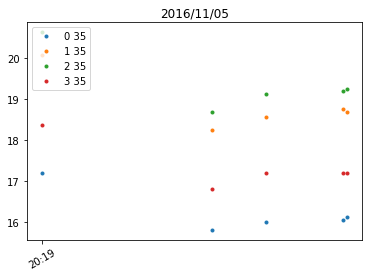

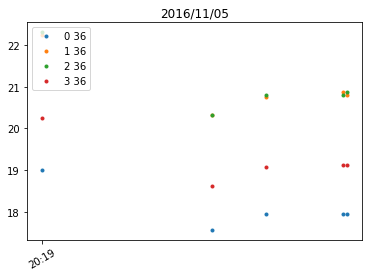

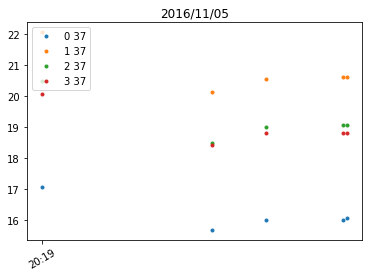

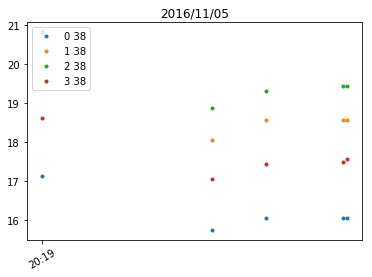

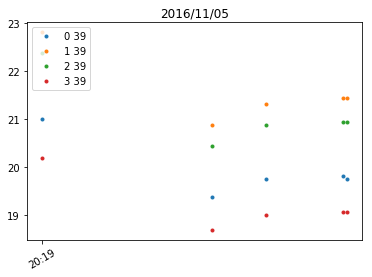

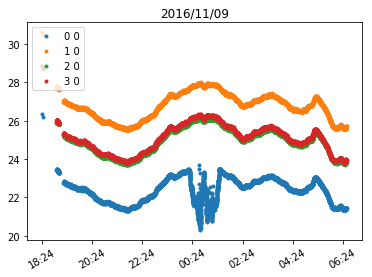

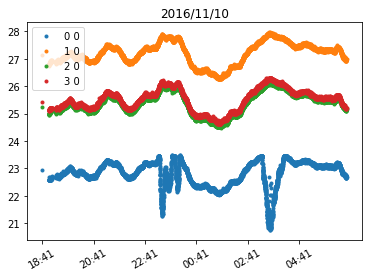

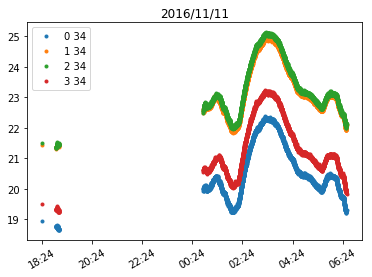

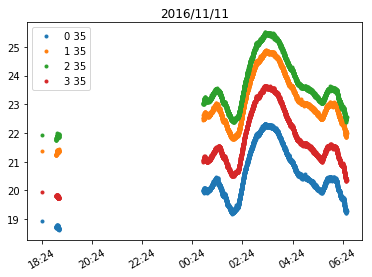

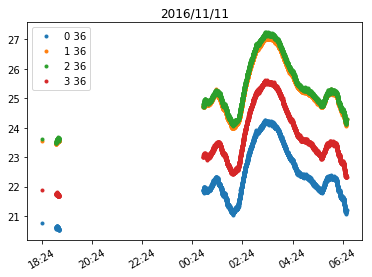

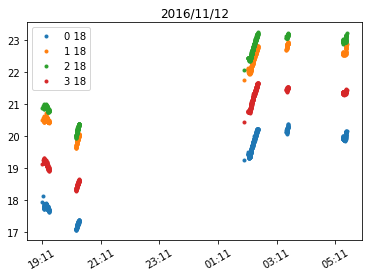

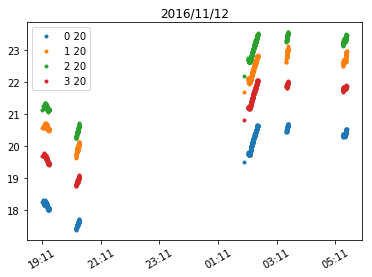

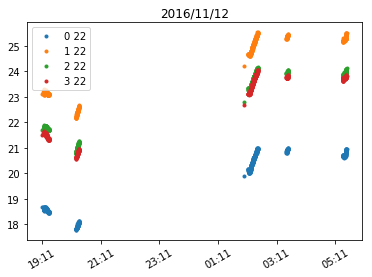

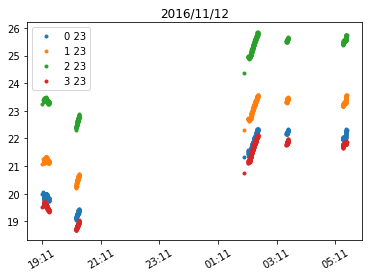

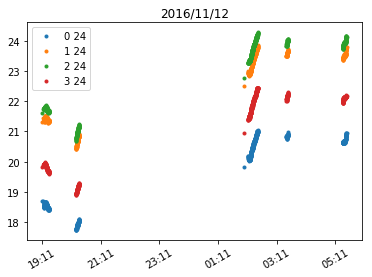

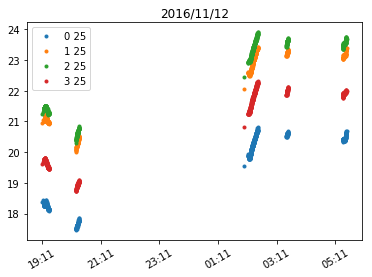

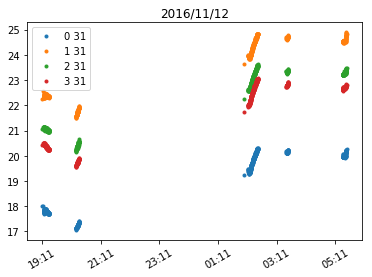

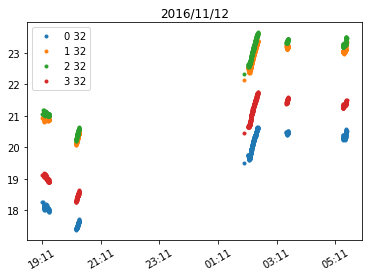

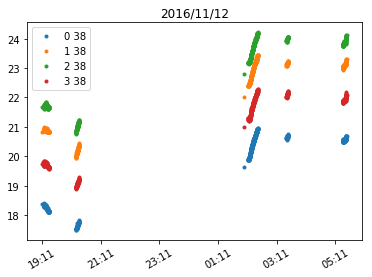

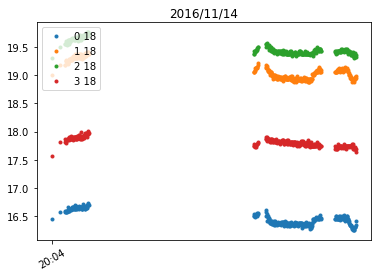

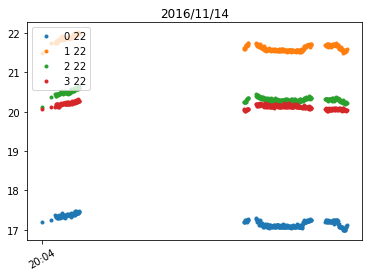

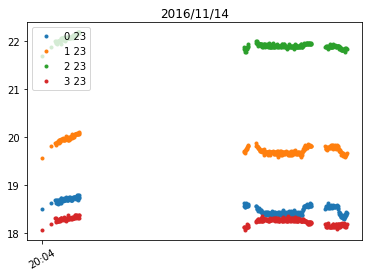

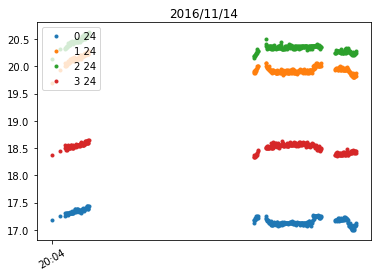

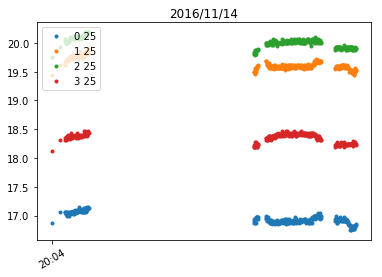

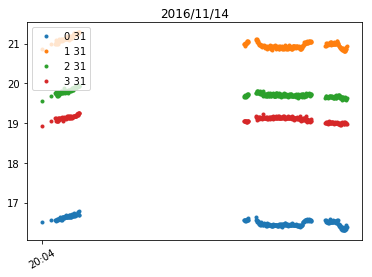

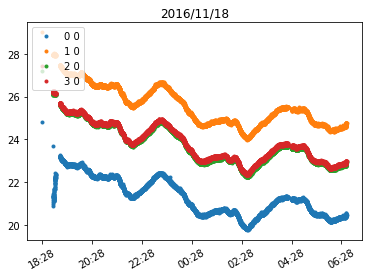

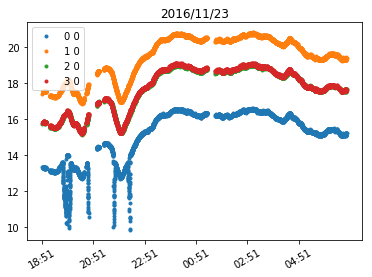

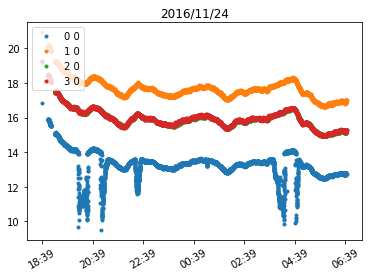

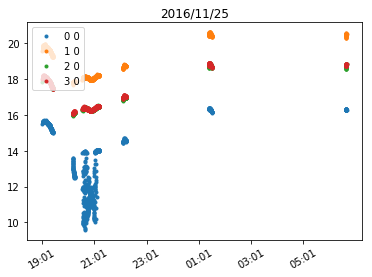

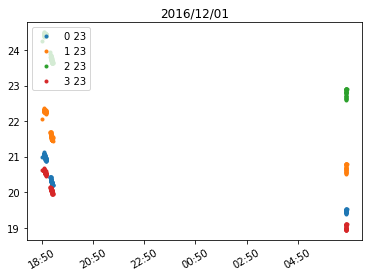

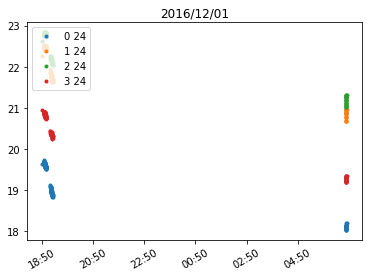

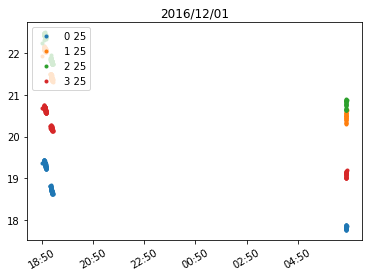

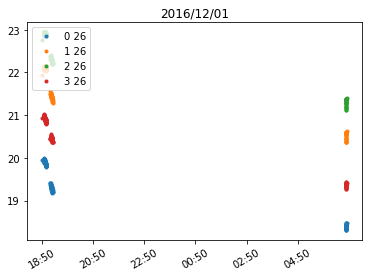

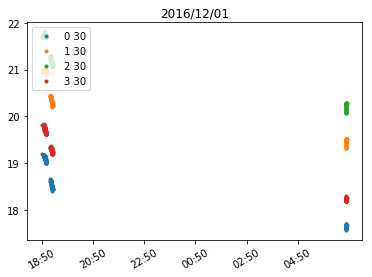

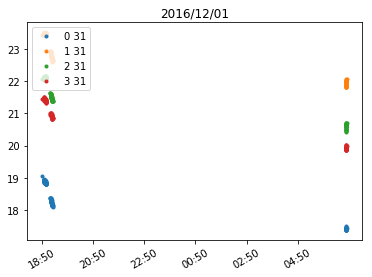

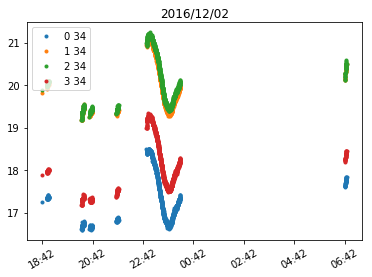

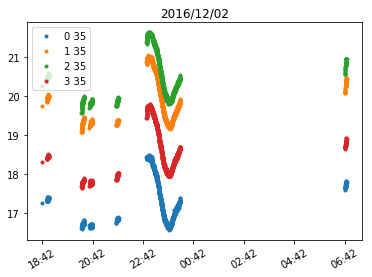

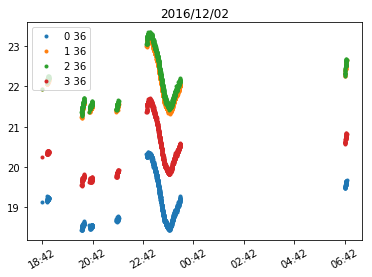

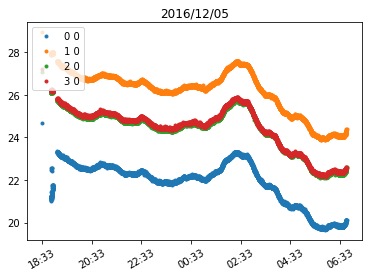

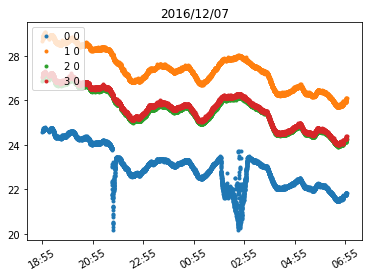

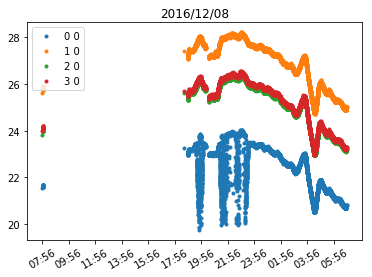

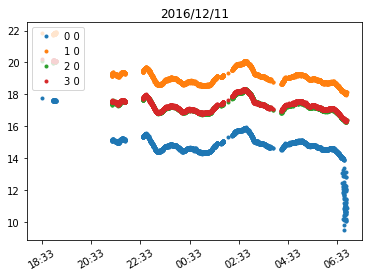

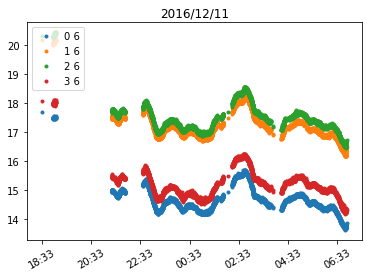

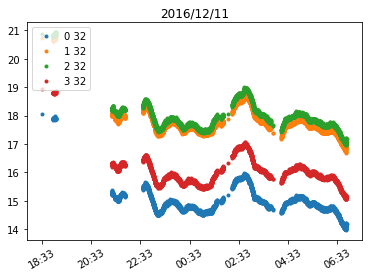

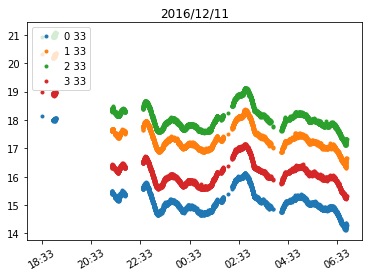

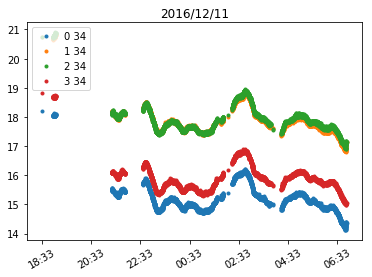

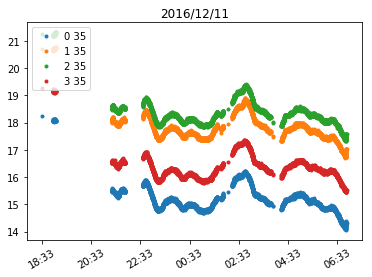

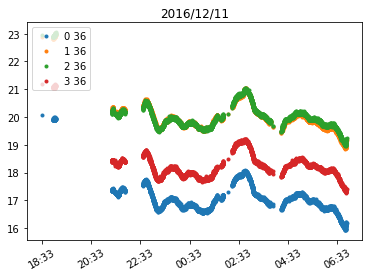

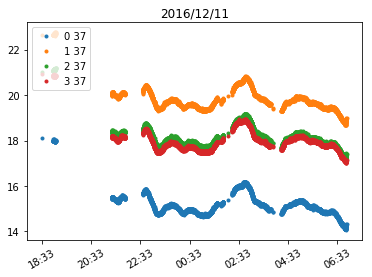

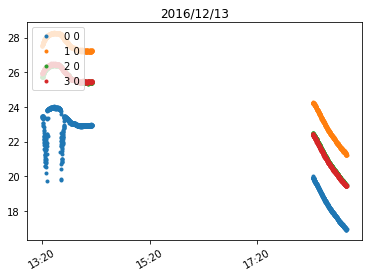

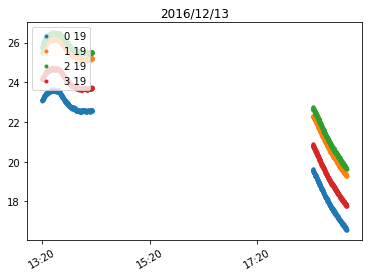

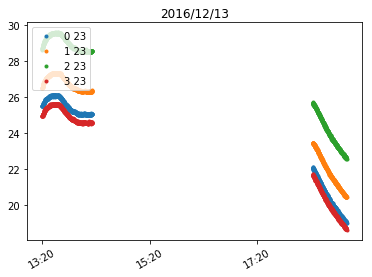

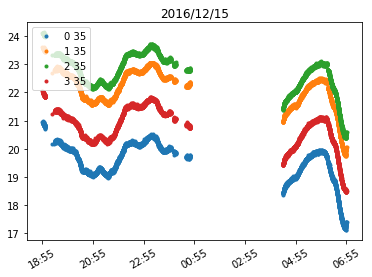

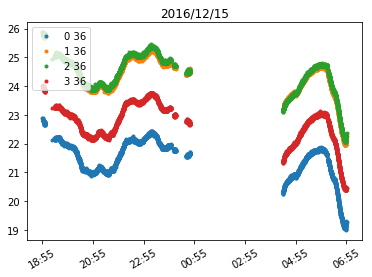

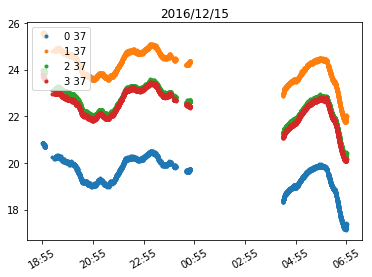

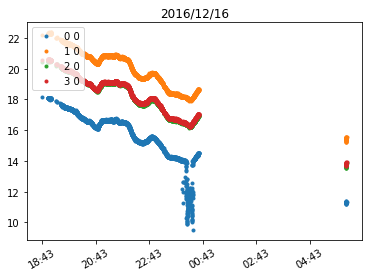

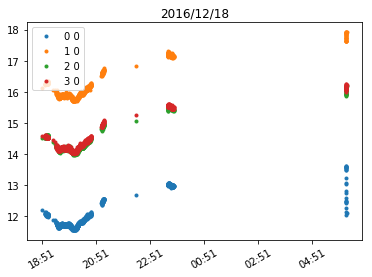

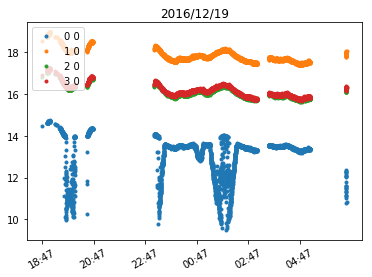

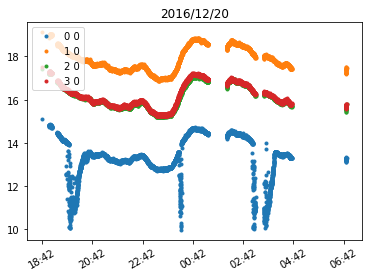

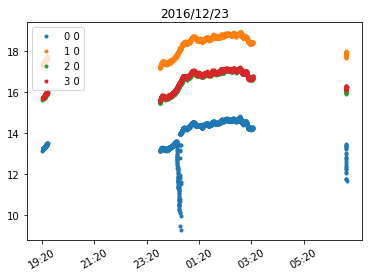

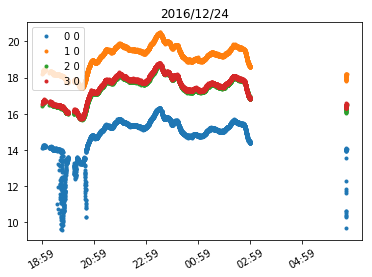

In [2]:
# schlechte nächte
for date in tqdm(pd.date_range("01-01-2016", "31-12-2016")):
    day, month, year = date.day, date.month, date.year
    try:
        t = Table.read(pre_path+'{}/{:02d}/{:02d}/{}{:02d}{:02d}.FAD_CONTROL_TEMPERATURE.fits'.format(year, month, day, year, month, day))
        temp = np.array((t['temp']))
        time = np.array((t['Time']))
        datetime = pd.to_datetime(time * 24 * 3600 * 1e9)
        for j in range(40):
            k_0 = j*4 + 0
            k_1 = j*4 + 1
            k_2 = j*4 + 2
            k_3 = j*4 + 3

            delta_0_1 = (temp[:, k_0] - temp[:, k_1])
            delta_0_2 = (temp[:, k_0] - temp[:, k_2])
            delta_0_3 = (temp[:, k_0] - temp[:, k_3])
            delta_1_2 = (temp[:, k_1] - temp[:, k_2])
            delta_1_3 = (temp[:, k_1] - temp[:, k_3])
            delta_2_3 = (temp[:, k_2] - temp[:, k_3])

            delta_std_0_1 = np.std(delta_0_1)
            delta_std_0_2 = np.std(delta_0_2)
            delta_std_0_3 = np.std(delta_0_3)
            delta_std_1_2 = np.std(delta_1_2)
            delta_std_1_3 = np.std(delta_1_3)
            delta_std_2_3 = np.std(delta_2_3)

    #             print(delta_std_0_1)
    #             print(delta_std_0_2)
    #             print(delta_std_0_3)
    #             print(delta_std_1_2)
    #             print(delta_std_1_3)
    #             print(delta_std_2_3)

            delta = 0.1
            if(delta_std_0_1 > delta or delta_std_0_2 > delta or
               delta_std_0_3 > delta or delta_std_1_2 > delta or
               delta_std_1_3 > delta or delta_std_2_3 > delta):
                plt.figure()
                plt.title('{}/{:02d}/{:02d}'.format(year, month, day))
                plt.plot(datetime, temp[:, k_0], '.', label=str(0)+' '+str(j))
                plt.plot(datetime, temp[:, k_1], '.', label=str(1)+' '+str(j))
                plt.plot(datetime, temp[:, k_2], '.', label=str(2)+' '+str(j))
                plt.plot(datetime, temp[:, k_3], '.', label=str(3)+' '+str(j))

                timeLabel = pd.date_range(start=datetime[0], end=datetime[-1], freq="2H")
                plt.xticks(timeLabel, timeLabel, rotation=30)
                plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
                
                plt.legend(loc='upper left')
                continue
            
    except Exception as errInfos:
        #print(str(errInfos))
        continue
